In [561]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize
import numpy.random as rnd
from scipy.stats import maxwell
import scipy.optimize
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 12})

In [725]:
print('Karl Nicholson 20332692')

Karl Nicholson 20332692


In [251]:
N = 1000

In [252]:
t = 0 #time 
k_B = 1
T = 1 #Initial Temp
F = 10 #force 
m = 1 #particle mass
M = 100 #piston mass
a = 1/10 #F/M is acceleration of piston
X0 = 200 ## from (1000/10) *2 - twice the equilibrium condition

In [253]:
#time to collision
def taupos(ap,p): #input ap as particle, p as piston
    x,v = ap
    X,V = p
    
    t = (M/F)*(V-v + np.sqrt( (V-v)**2 - 2*(F/M)*(np.abs(x) - np.abs(X)) ) )
    return t

def tauneg(ap,p):
    x,v = ap
    X,V = p
    
    t = (M/F)*( V+v + np.sqrt( (V+v)**2 +2*(F/M)*(np.abs(x)+np.abs(X)) ) )
    return t

In [254]:
#post collision velocities of particle and piston
def post_vel_pos(v,V):
    global m,M
    W = (2*m*v + (M-m)*V )/(m+M)
    w = (2*M*V +(m-M)*v )/( m+M )
    return w,W

def post_vel_neg(v,V):
    global m,M
    W = (-2*m*v + (M-m)*V )/(m+M)
    w = (-2*M*V +(m-M)*v )/( m+M )
    return w,W

In [290]:
#update particle location, update piston loc and vel
def Xfun(p,dt):
    global a
    x0,v0 = p
    return x0 + v0*dt -0.5*a*dt**2

def Vfun(p,dt):
    global a
    x0,v0 = p
    return v0 -a*dt

def xfun(ap, dt):
    
    x0,v0 = ap
    return x0 +v0*dt
#v for particle is constant unless it hits the piston

In [309]:
##initialize arrays of x,v for particles and pistons
z = np.zeros((N,2))
for i in range(len(z)):
    z[i][0] = rnd.uniform(-X0,X0)

for i in range(len(z)):
    z[i][1] = rnd.normal(0,np.sqrt(k_B*T/m))

piston = np.zeros(2)
piston[0] = X0
piston[1] = rnd.normal(0,np.sqrt(k_B*T/m))

positions = []
times = []

[]

In [292]:
def waittime(z,p):
    global F,M,m
    taulist = []
    for i in range(len(z)):
        if z[i][1] >=0 and z[i][0]>=0:
            tau = taupos(z[i],p)
            taulist.append(tau)
            
        elif z[i][1] <0 and z[i][0]<0:
            tau = taupos(-z[i],p)
            taulist.append(tau)
            
        elif z[i][1]<0 and z[i][0] >0:
            tau = tauneg(z[i],p)
            taulist.append(tau)
            
        elif z[i][1]>0 and z[i][0]<0:
            tau = tauneg(-1*z[i],p)
            taulist.append(tau)
            
#     print('taulist',taulist)
    t_index = np.argmin(taulist)
    timechange = np.min(taulist)
    if timechange != taulist[t_index]:
        print('TAU PROBLEM waittime')
        print(taulist)
        print(t_index)
        
    return timechange, t_index

# def particle_update(z,dt):
#     for i in range(len(z)):
#         z[i][0] = xfun(z[i])

In [329]:
def ex_a(a,p,iterations):
    its = 0
    t=0


    
    while its<iterations:
        positions.append(np.abs(p[0]))
        timechange,t_index = waittime(a,p)
        
        p[1] = Vfun(p,timechange) #update piston velocity
#         p[0] = Xfun(p,timechange) #update piston location
        for i in range(len(a)): #update particle locations
            a[i][0] = xfun(a[i],timechange)
        
#         print('particle',a[t_index] ,'piston' , p)
        
        if a[t_index][1]>0: #update particle and piston after collision
            a[t_index][1], p[1] = post_vel_pos(a[t_index][1], p[1])
        elif a[t_index][1]<0:
            a[t_index][1], p[1] = post_vel_neg(a[t_index][1], p[1])
        p[0] = a[t_index][0]
#         print('particles', a ,'piston after collision',p)
        
        t += timechange
        times.append(t)
        if its % 2000 == 0:
            print(its)
        
        its+=1

In [294]:
z #probs : pos x,neg v ... neg x pos v... pos x neg v

array([[-1.79360244e+02, -1.47120202e+00],
       [-1.52373043e+01,  9.78212462e-01],
       [ 9.91945444e+01,  1.05420708e-01],
       ...,
       [-2.90452372e+01,  1.25217216e+00],
       [ 1.08237052e+02, -1.04753907e+00],
       [ 1.58670135e+01, -8.16144916e-01]])

In [295]:
piston

array([200.        ,   0.78024807])

In [296]:
ex_a(z,piston,20000)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


20000 20000


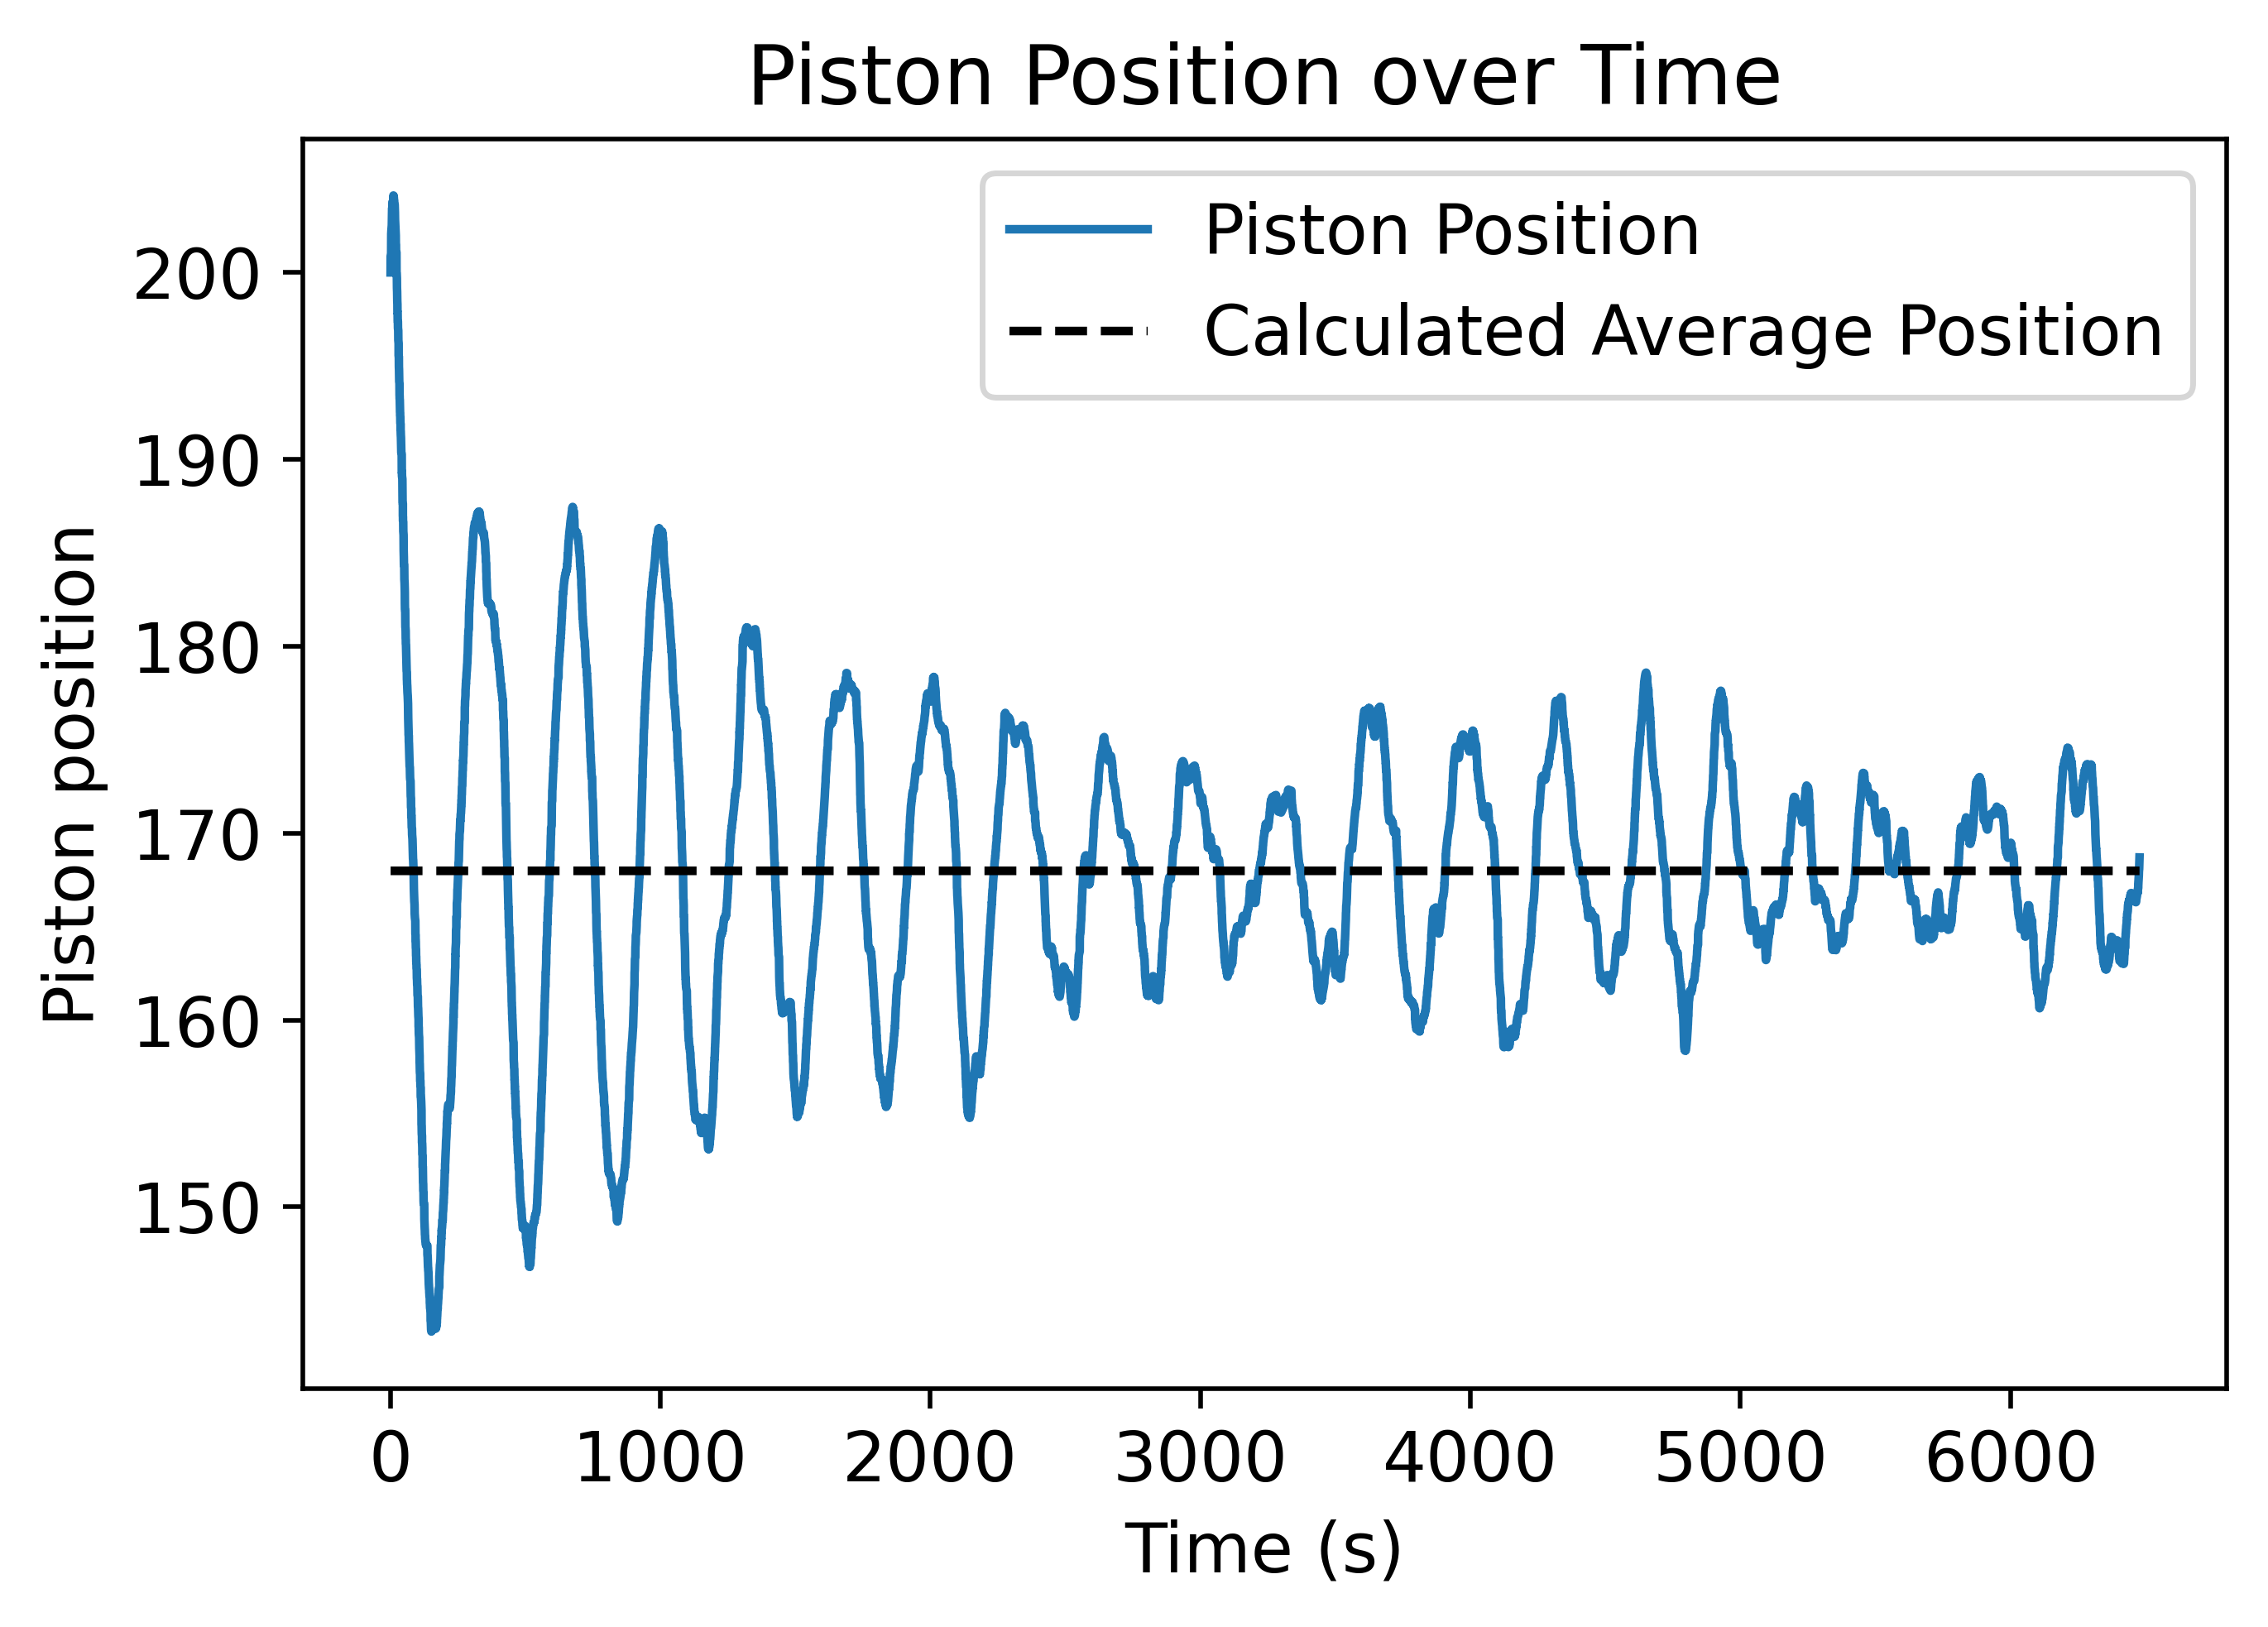

In [304]:
print(len(times),len(positions))

plt.figure(dpi=500)
plt.plot(times,positions[:len(times)], label='Piston Position')
plt.title('Piston Position over Time')
plt.ylabel('Piston position ')
plt.xlabel('Time (s)')
plt.plot(times,av*np.ones(len(times)),label='Calculated Average Position',ls='--',c='black')
plt.legend(loc='upper right')
plt.savefig('piston_vs_time_1',bbox_inches='tight')


In [299]:
##ex_b
#choose last 5000 iterations for finding the average 
av = np.average(positions[15000:], weights= times[15000:])
print(av) #average is 167.98


167.98093123391908


In [484]:
def ex_b(a,p,iterations):
    its = 0
    t=0


    
    while its<iterations:
        positions.append(np.abs(p[0]))
        timechange,t_index = waittime(a,p)
        
        p[1] = Vfun(p,timechange) #update piston velocity
#         p[0] = Xfun(p,timechange) #update piston location
        for i in range(len(a)): #update particle locations
            a[i][0] = xfun(a[i],timechange)
        
#         print('particle',a[t_index] ,'piston' , p)
        
        if a[t_index][1]>0: #update particle and piston after collision
            a[t_index][1], p[1] = post_vel_pos(a[t_index][1], p[1])
        elif a[t_index][1]<0:
            a[t_index][1], p[1] = post_vel_neg(a[t_index][1], p[1])
        p[0] = a[t_index][0]
#         print('particles', a ,'piston after collision',p)
        
        t += timechange
        times.append(t)
        if its % 2000 == 0:
            print(its)
        
        its+=1
        
    exb_poslist.append(positions) #nests the list so they can all be stored even 
    exb_timelist.append(times) #           through multiple iterations

In [352]:
Forces = [.1,.3,1,3,10,30,100]

exb_poslist = []
exb_timelist = []
exb_avlist = []

for f in range(len(Forces)):
    F = Forces[f]
    X0 = 1000/F
    a = F/M
    
    ##initialize the arrays
    z = np.zeros((N,2))
    for i in range(len(z)):
        z[i][0] = rnd.uniform(-X0,X0)

    for i in range(len(z)):
        z[i][1] = rnd.normal(0,np.sqrt(k_B*T/m))

    piston = np.zeros(2)
    piston[0] = X0
    piston[1] = rnd.normal(0,np.sqrt(k_B*T/m))

    positions = []
    times = []
    
    ex_b(z,piston,20000)
    average = np.average(positions[15000:], weights= times[15000:])
    exb_avlist.append(average)
    

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
0
2000
4000
6000
8000
10000
12000
14000
16000
18000


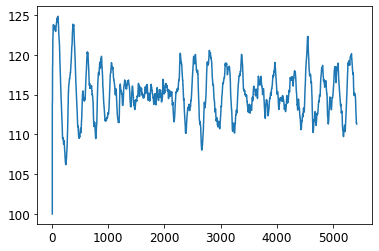

In [372]:
plt.plot(exb_timelist[4], exb_poslist[4])

ideal_gas = []
for i in range(len(Forces)):
    ideal_gas.append(N/Forces[i]) #with R and T as 1

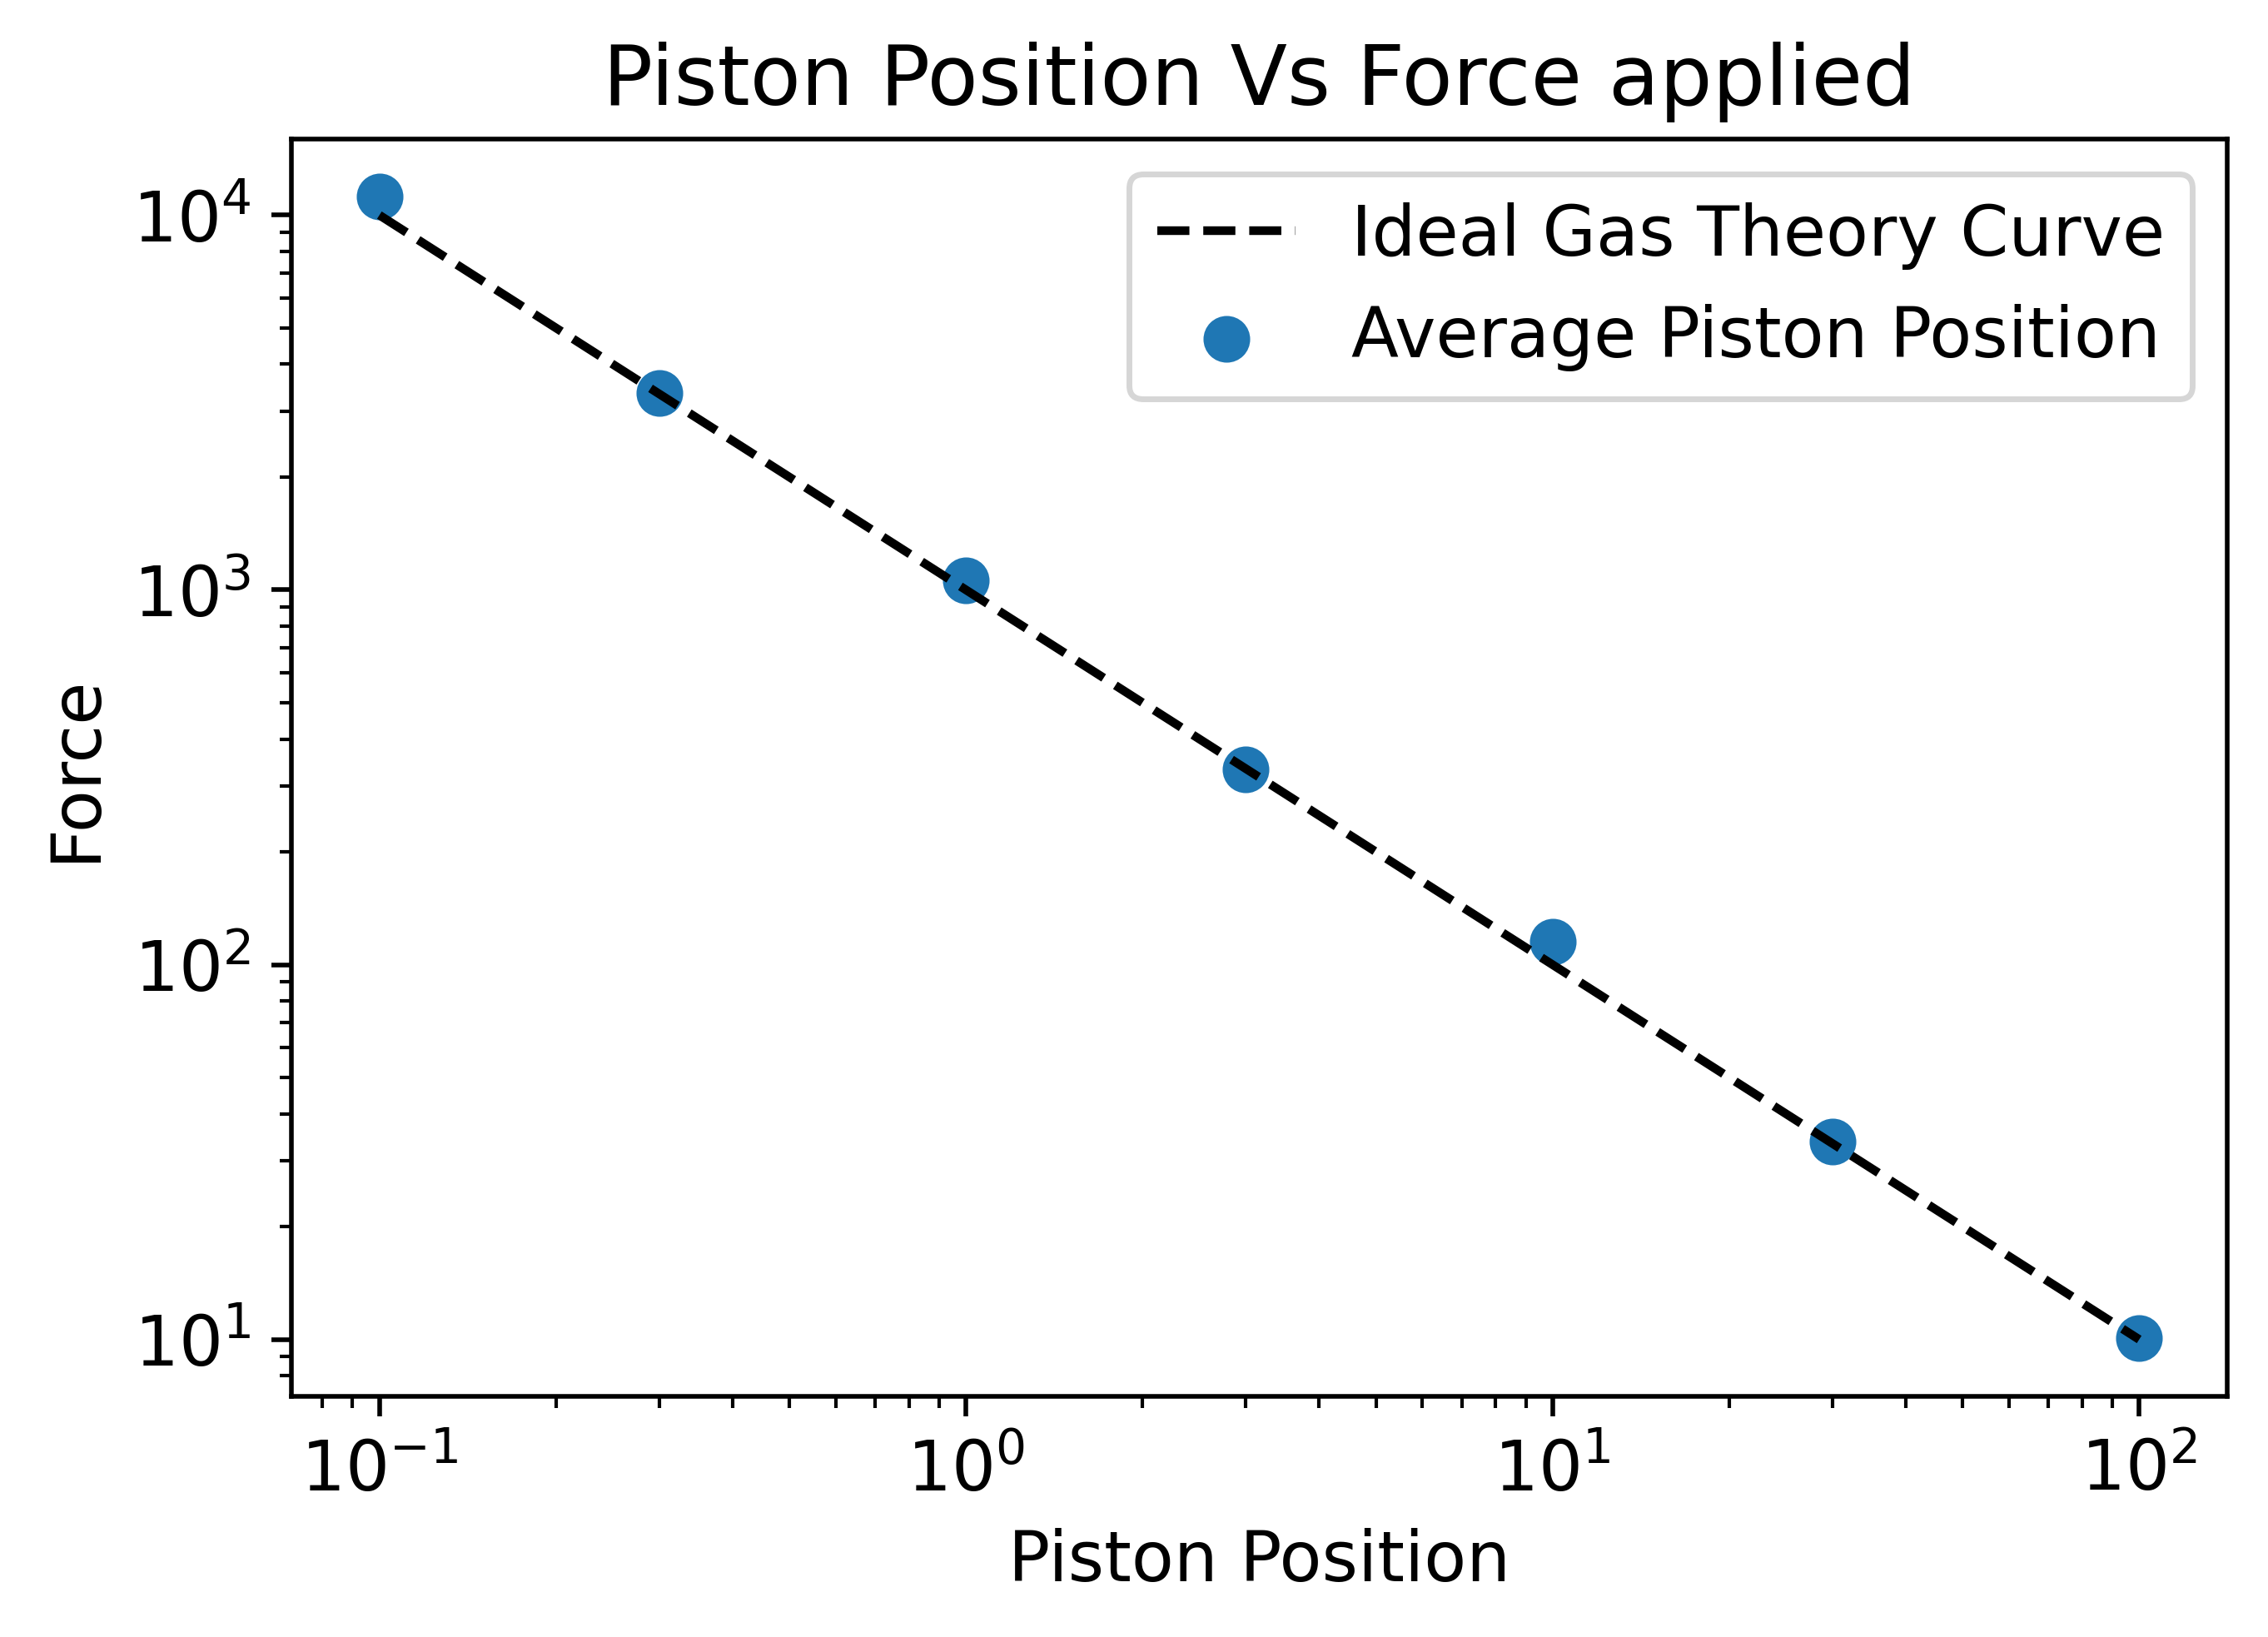

In [386]:
plt.figure(dpi=500)
plt.plot(Forces,ideal_gas,'--',c='black',label='Ideal Gas Theory Curve')
plt.scatter(Forces,exb_avlist,s=50,label='Average Piston Position')
# plt.scatter(Forces,exb_avlist)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Force')
plt.xlabel('Piston Position')
plt.title('Piston Position Vs Force applied')
plt.legend(loc='upper right')
plt.savefig('exb_force-pos',bbox_inches='tight')

In [430]:
###Ex C

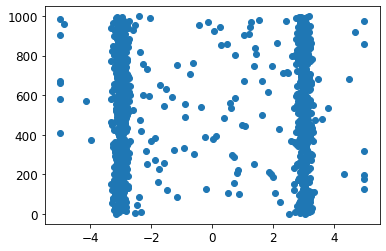

In [400]:
# plt.scatter(velocities,range(len(velocities)))

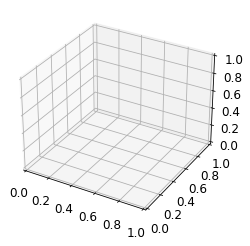

In [421]:
# x = np.linspace(maxwell.ppf(0.0001),maxwell.ppf(2.5), 100)
# # x = np.linspace(maxwell.rvs(0.001),maxwell.rvs(0.999))
# plt.plot(x,maxwell.pdf(x))

# maxwell.ppf(0.0001)

In [494]:
bs = [] #bins
cs = []
exc_iterations = []


def ex_c(a,p,iterations):
    its = 0
    t=0


    
    while its<iterations:
        positions.append(np.abs(p[0]))
        timechange,t_index = waittime(a,p)
        
        p[1] = Vfun(p,timechange) #update piston velocity
#         p[0] = Xfun(p,timechange) #update piston location
        for i in range(len(a)): #update particle locations
            a[i][0] = xfun(a[i],timechange)
        
#         print('particle',a[t_index] ,'piston' , p)
        
        if a[t_index][1]>0: #update particle and piston after collision
            a[t_index][1], p[1] = post_vel_pos(a[t_index][1], p[1])
        elif a[t_index][1]<0:
            a[t_index][1], p[1] = post_vel_neg(a[t_index][1], p[1])
        p[0] = a[t_index][0]
#         print('particles', a ,'piston after collision',p)
        working_vs = [entry[1] for entry in z]
        k,l = np.histogram(working_vs,30)
        bs.append(l)
        cs.append(k)
        t += timechange
        times.append(t)
        if its % 2000 == 0:
            print(its)
        
        its+=1
        
    exb_poslist.append(positions) #nests the list so they can all be stored even 
    exb_timelist.append(times) #           through multiple iterations

In [495]:
choices = [-2,2]
vs = np.zeros((20000,N))

#initialize arrays
##initialize the arrays
z = np.zeros((N,2))
for i in range(len(z)):
    z[i][0] = rnd.uniform(-X0,X0)

for i in range(len(z)):
    z[i][1] = rnd.choice(choices,1)

piston = np.zeros(2)
piston[0] = X0
piston[1] = rnd.normal(0,np.sqrt(k_B*T/m))

positions = []
times = []
    
ex_c(z,piston,20000)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000


In [510]:
len(cs)

20000

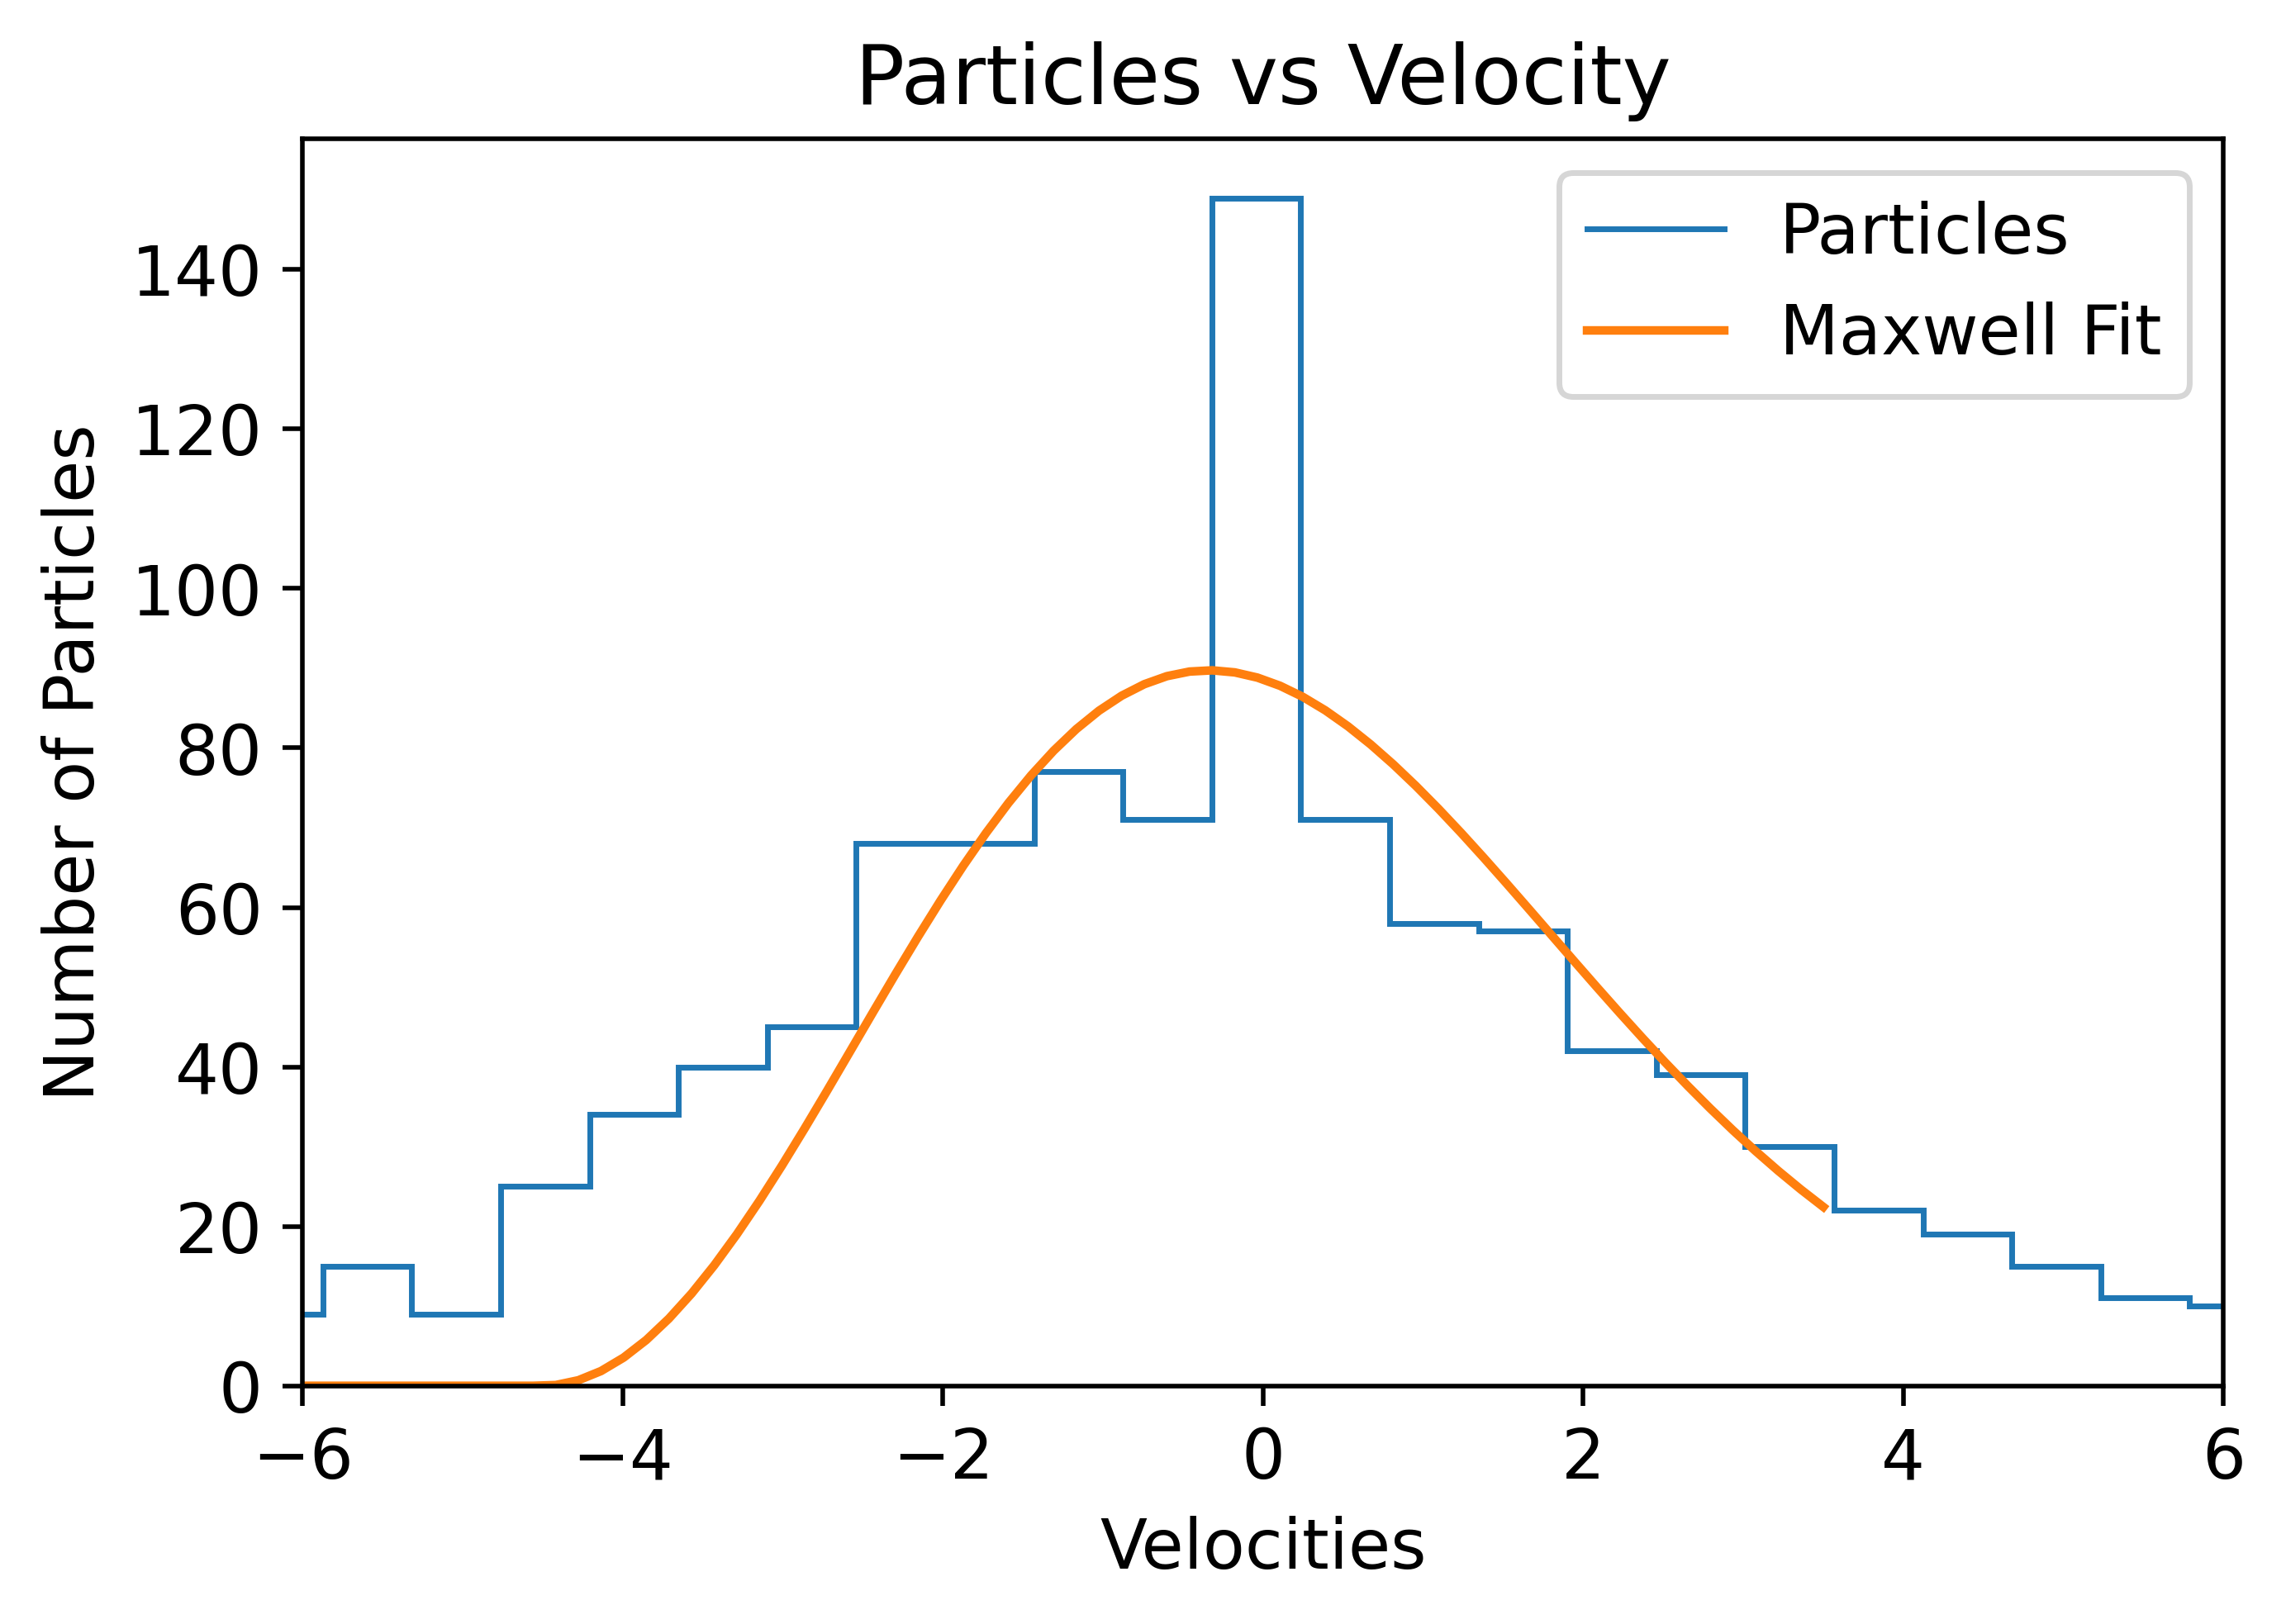

In [724]:
bins, counts = bs[-1][1:], cs[-1]


parameters = maxwell.fit(bins,floc=-1)
# par1, extra = scipy.optimize.curve_fit(maxwell, bins, counts) 
# maxw_vals = [maxwell(entry,par1[0]) for entry in bins] #[0] changes (30,1) to just (30)

plt.figure(dpi=500)
plt.stairs(cs[-1],bs[-1], label = 'Particles')
xs = np.linspace(-7,7,100)
maxwell_vals = [maxwell.pdf(x,*parameters)*450 for x in xs] #500 to make visible
plt.plot(xs -3.5,maxwell_vals,label='Maxwell Fit')
plt.title('Particles vs Velocity')
plt.ylabel('Number of Particles')
plt.xlabel('Velocities')
plt.legend(loc='upper right')
plt.xlim(-6,6)

plt.savefig('final_histogram_exc',bbox_inches='tight')

In [698]:
exc_iterations = np.linspace(0,20000,20000)
plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist_iterations = [0,1000,2000,3000,4000,6000, 10000, 15000]
for i in hist_iterations:

    x1s = (bs[i][:-1] + bs[i][1:])/2
#     print(x1s)
#     ax.stairs(cs[i],bs[i])
ax.bar3d(exc_iterations[i], bs[i][1:],np.ones(len(cs[i])),np.ones(len(cs[i])), np.ones(len(cs[i])),cs[i],)

ax.set_xlabel('X t')
ax.set_ylabel('Y v')
ax.set_zlabel('Z cts')
plt.show()

<Figure size 432x288 with 0 Axes>

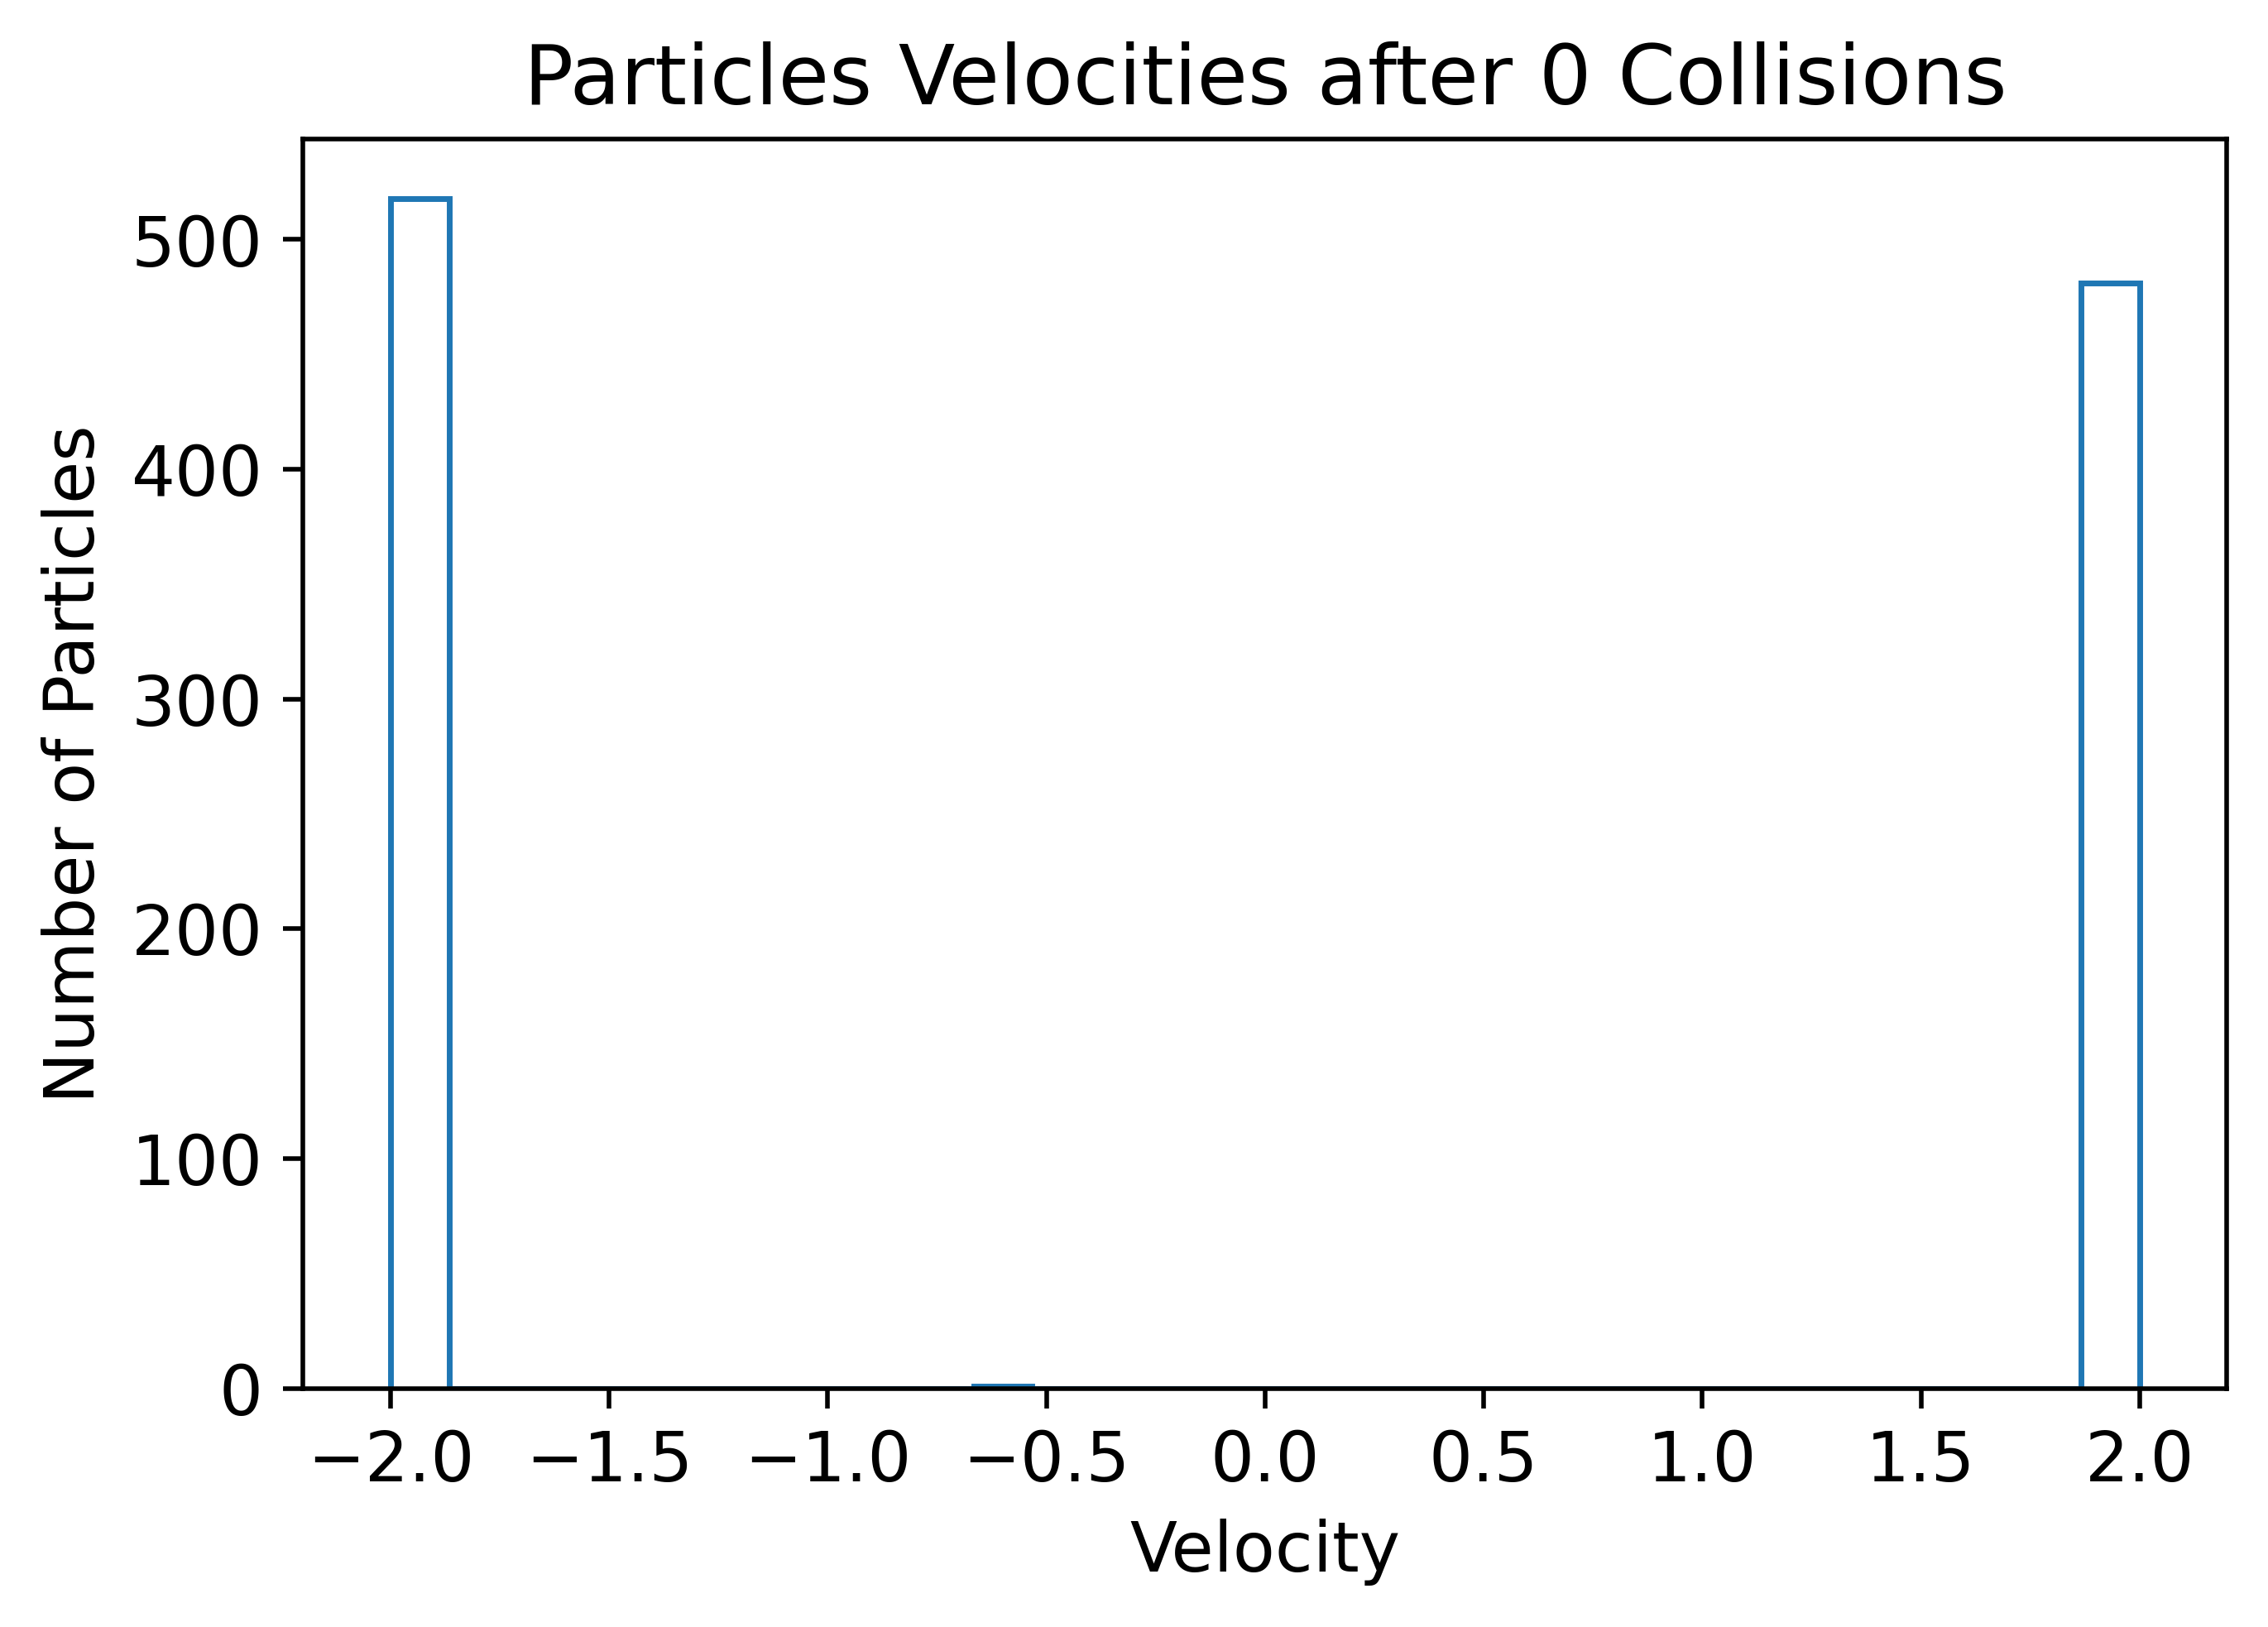

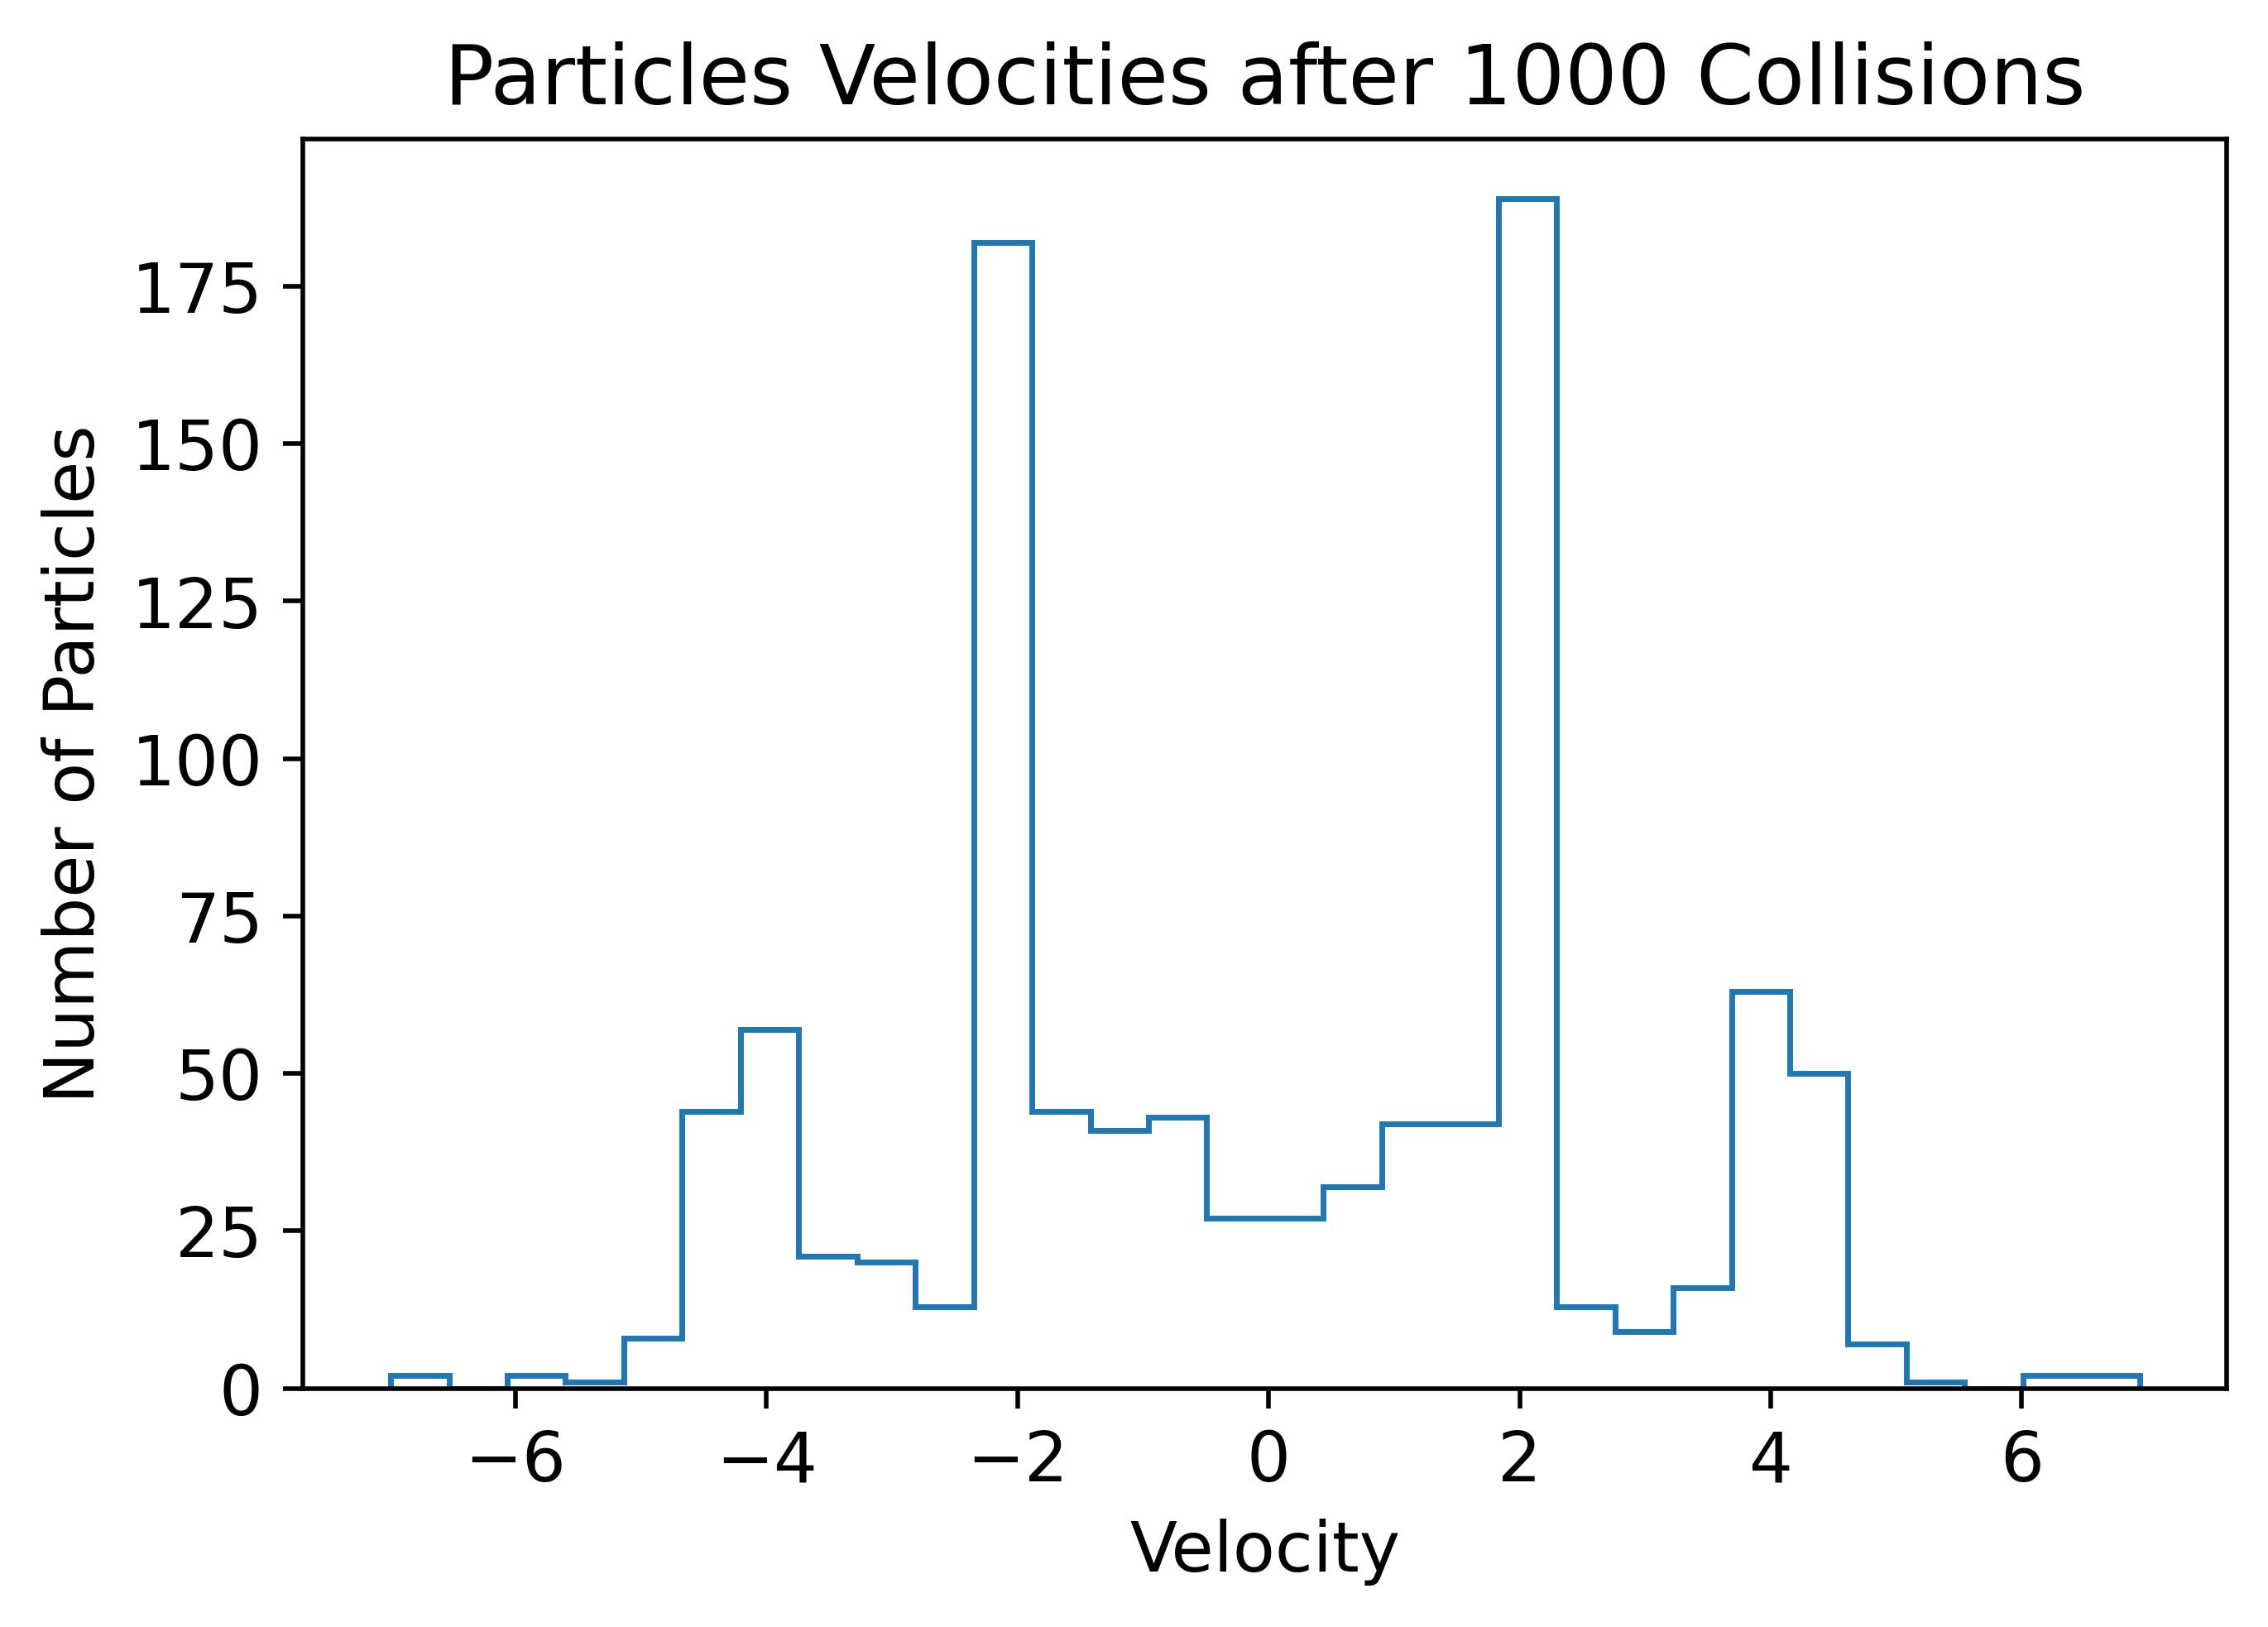

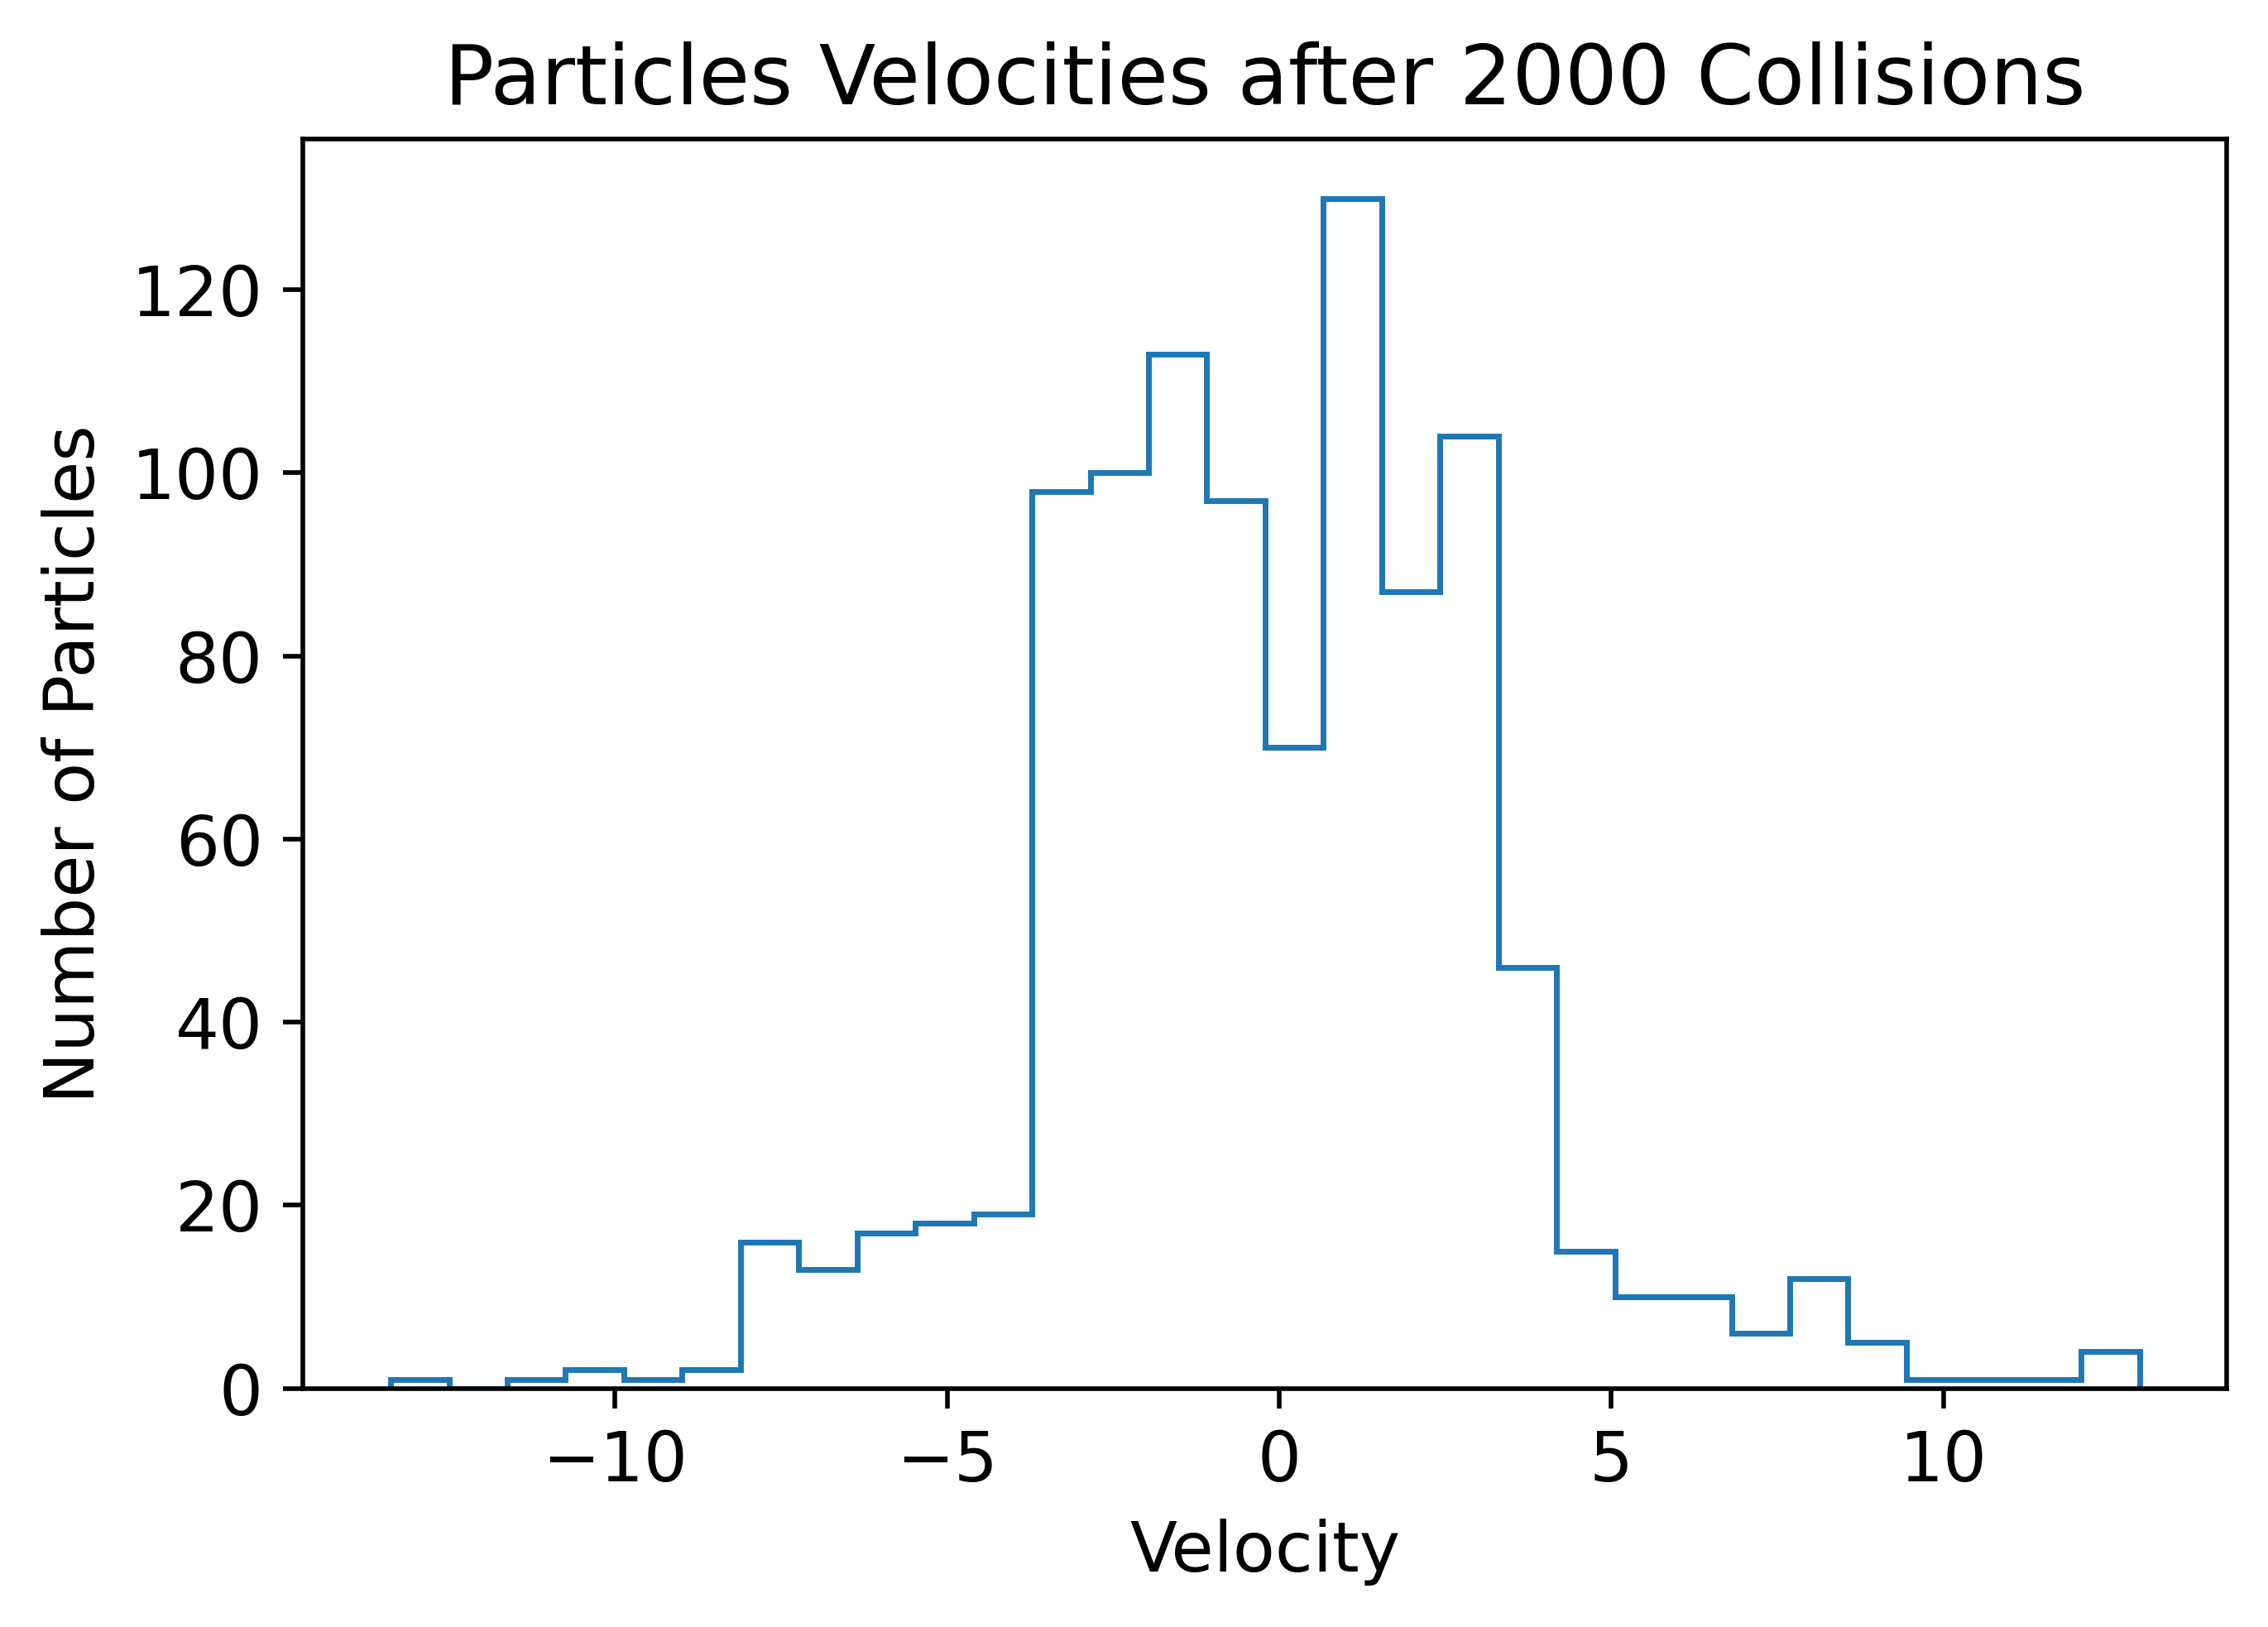

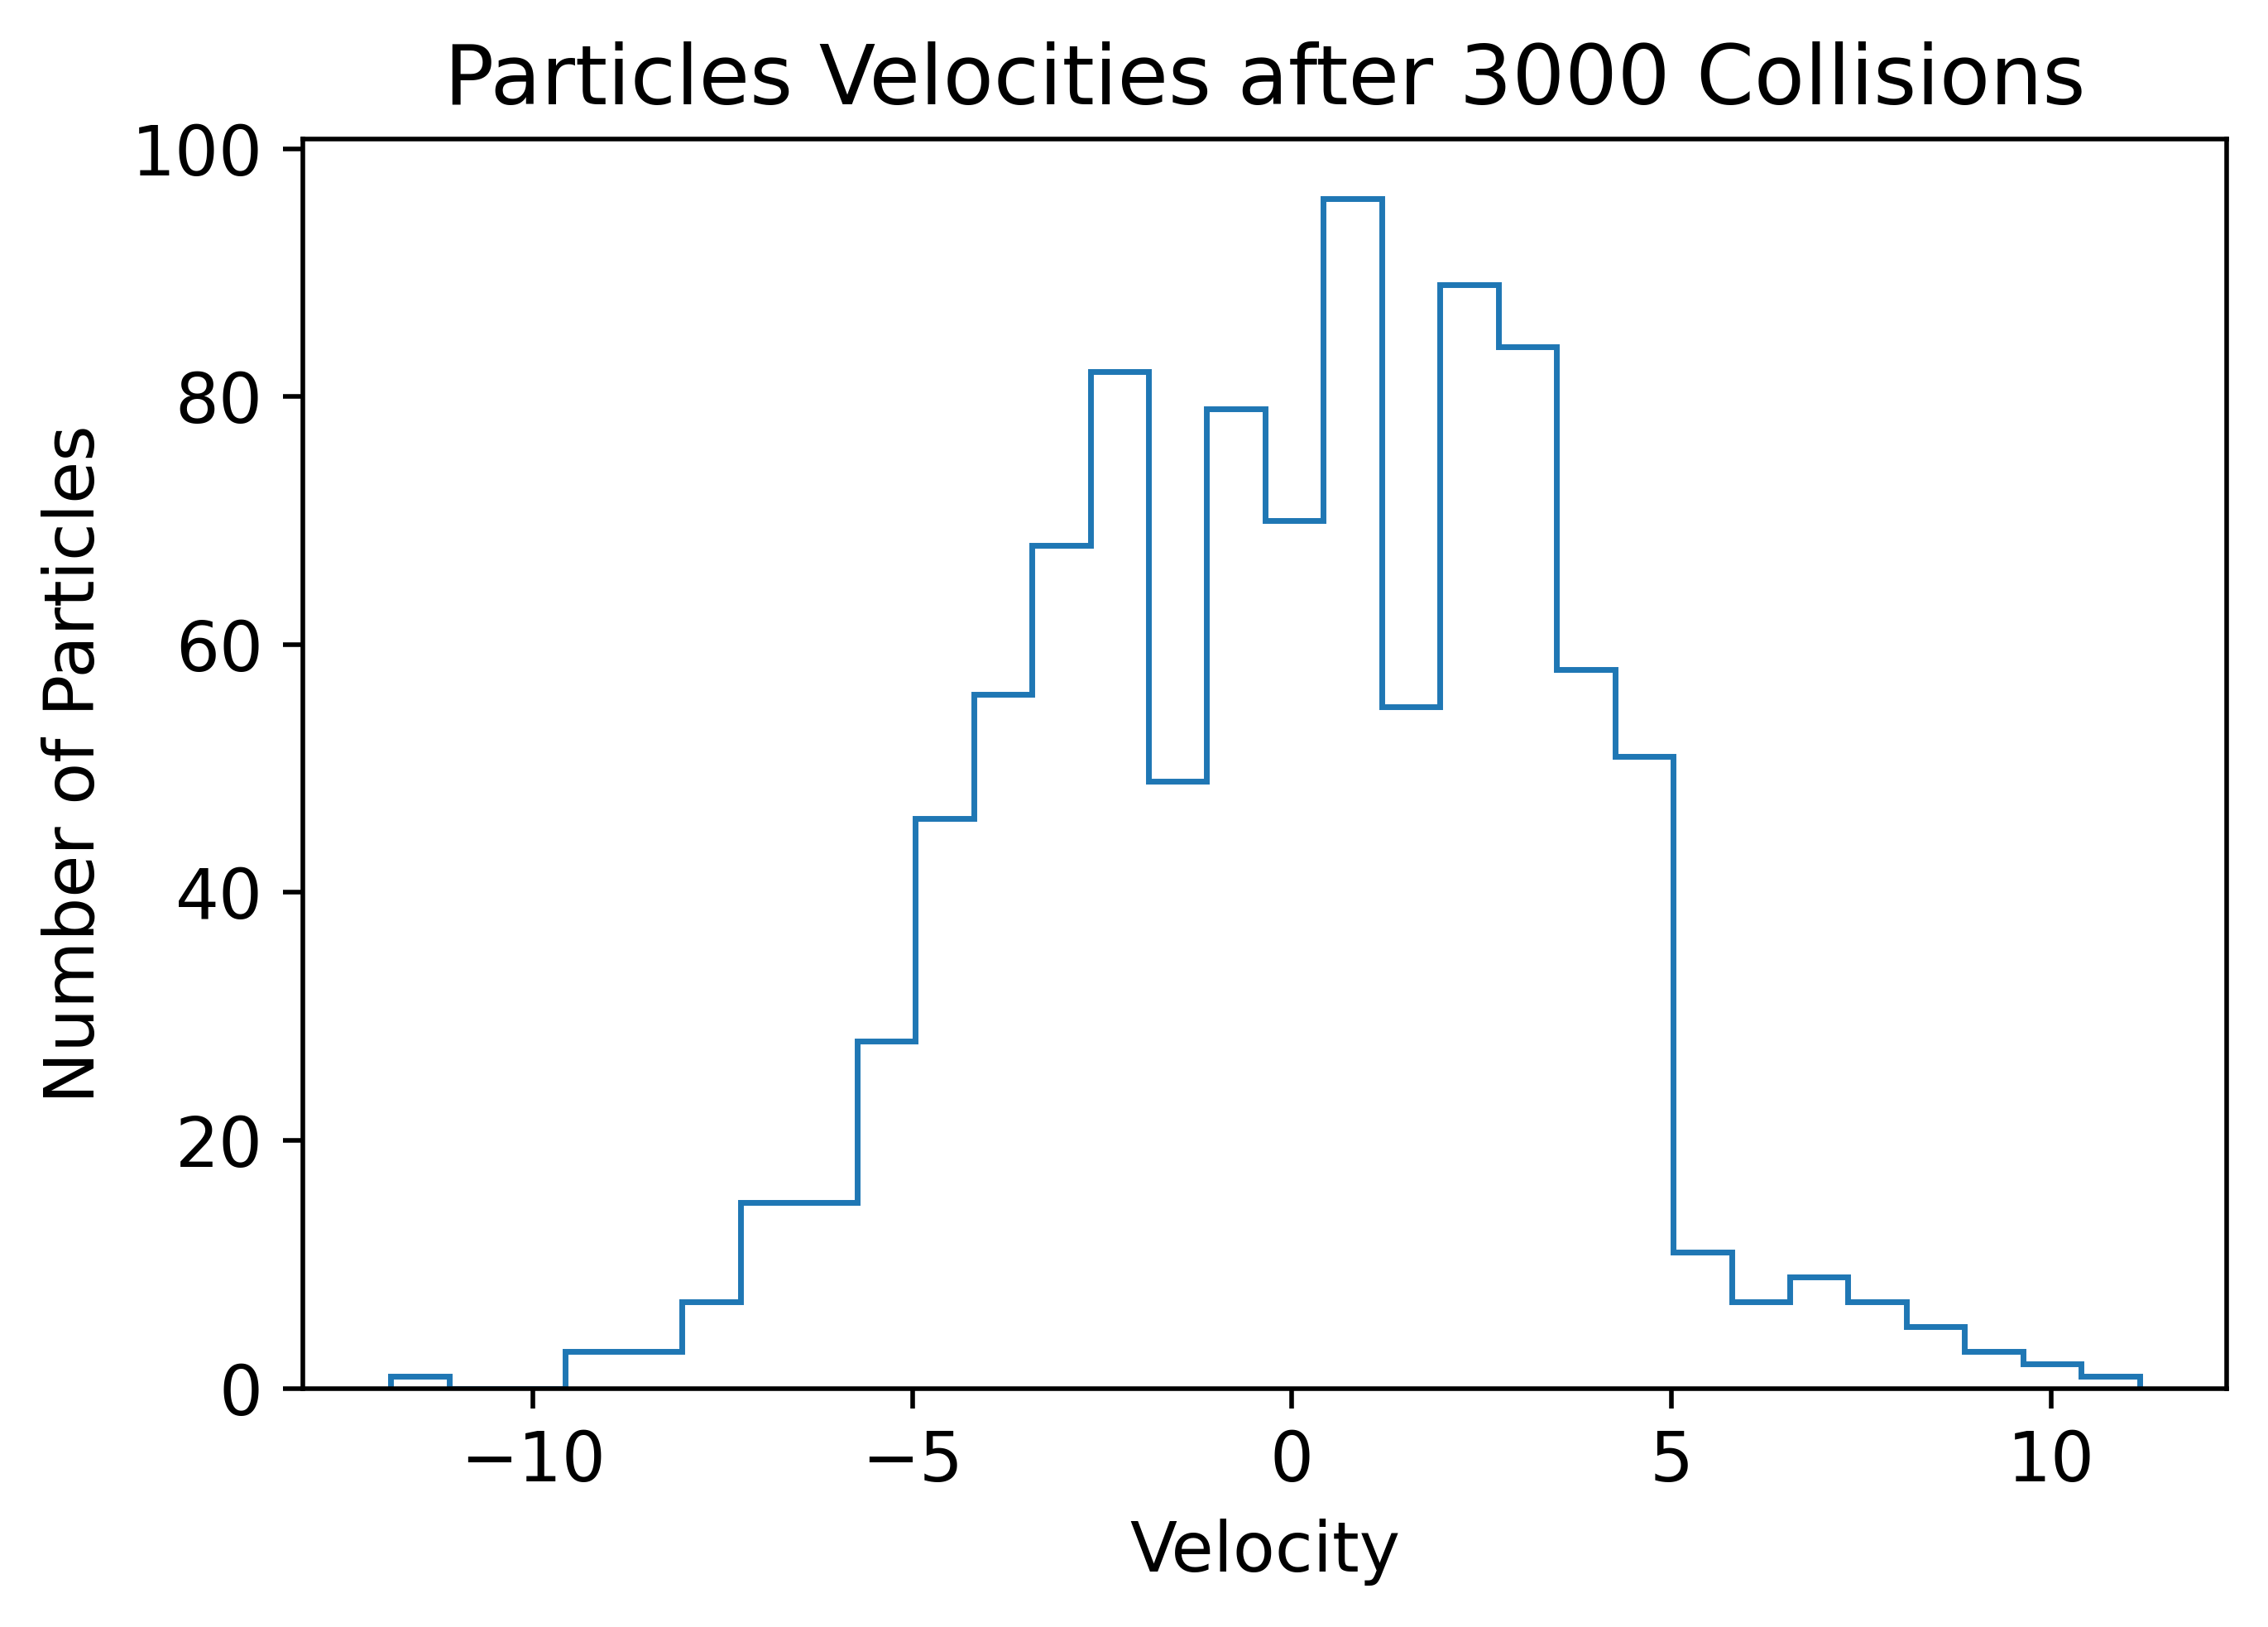

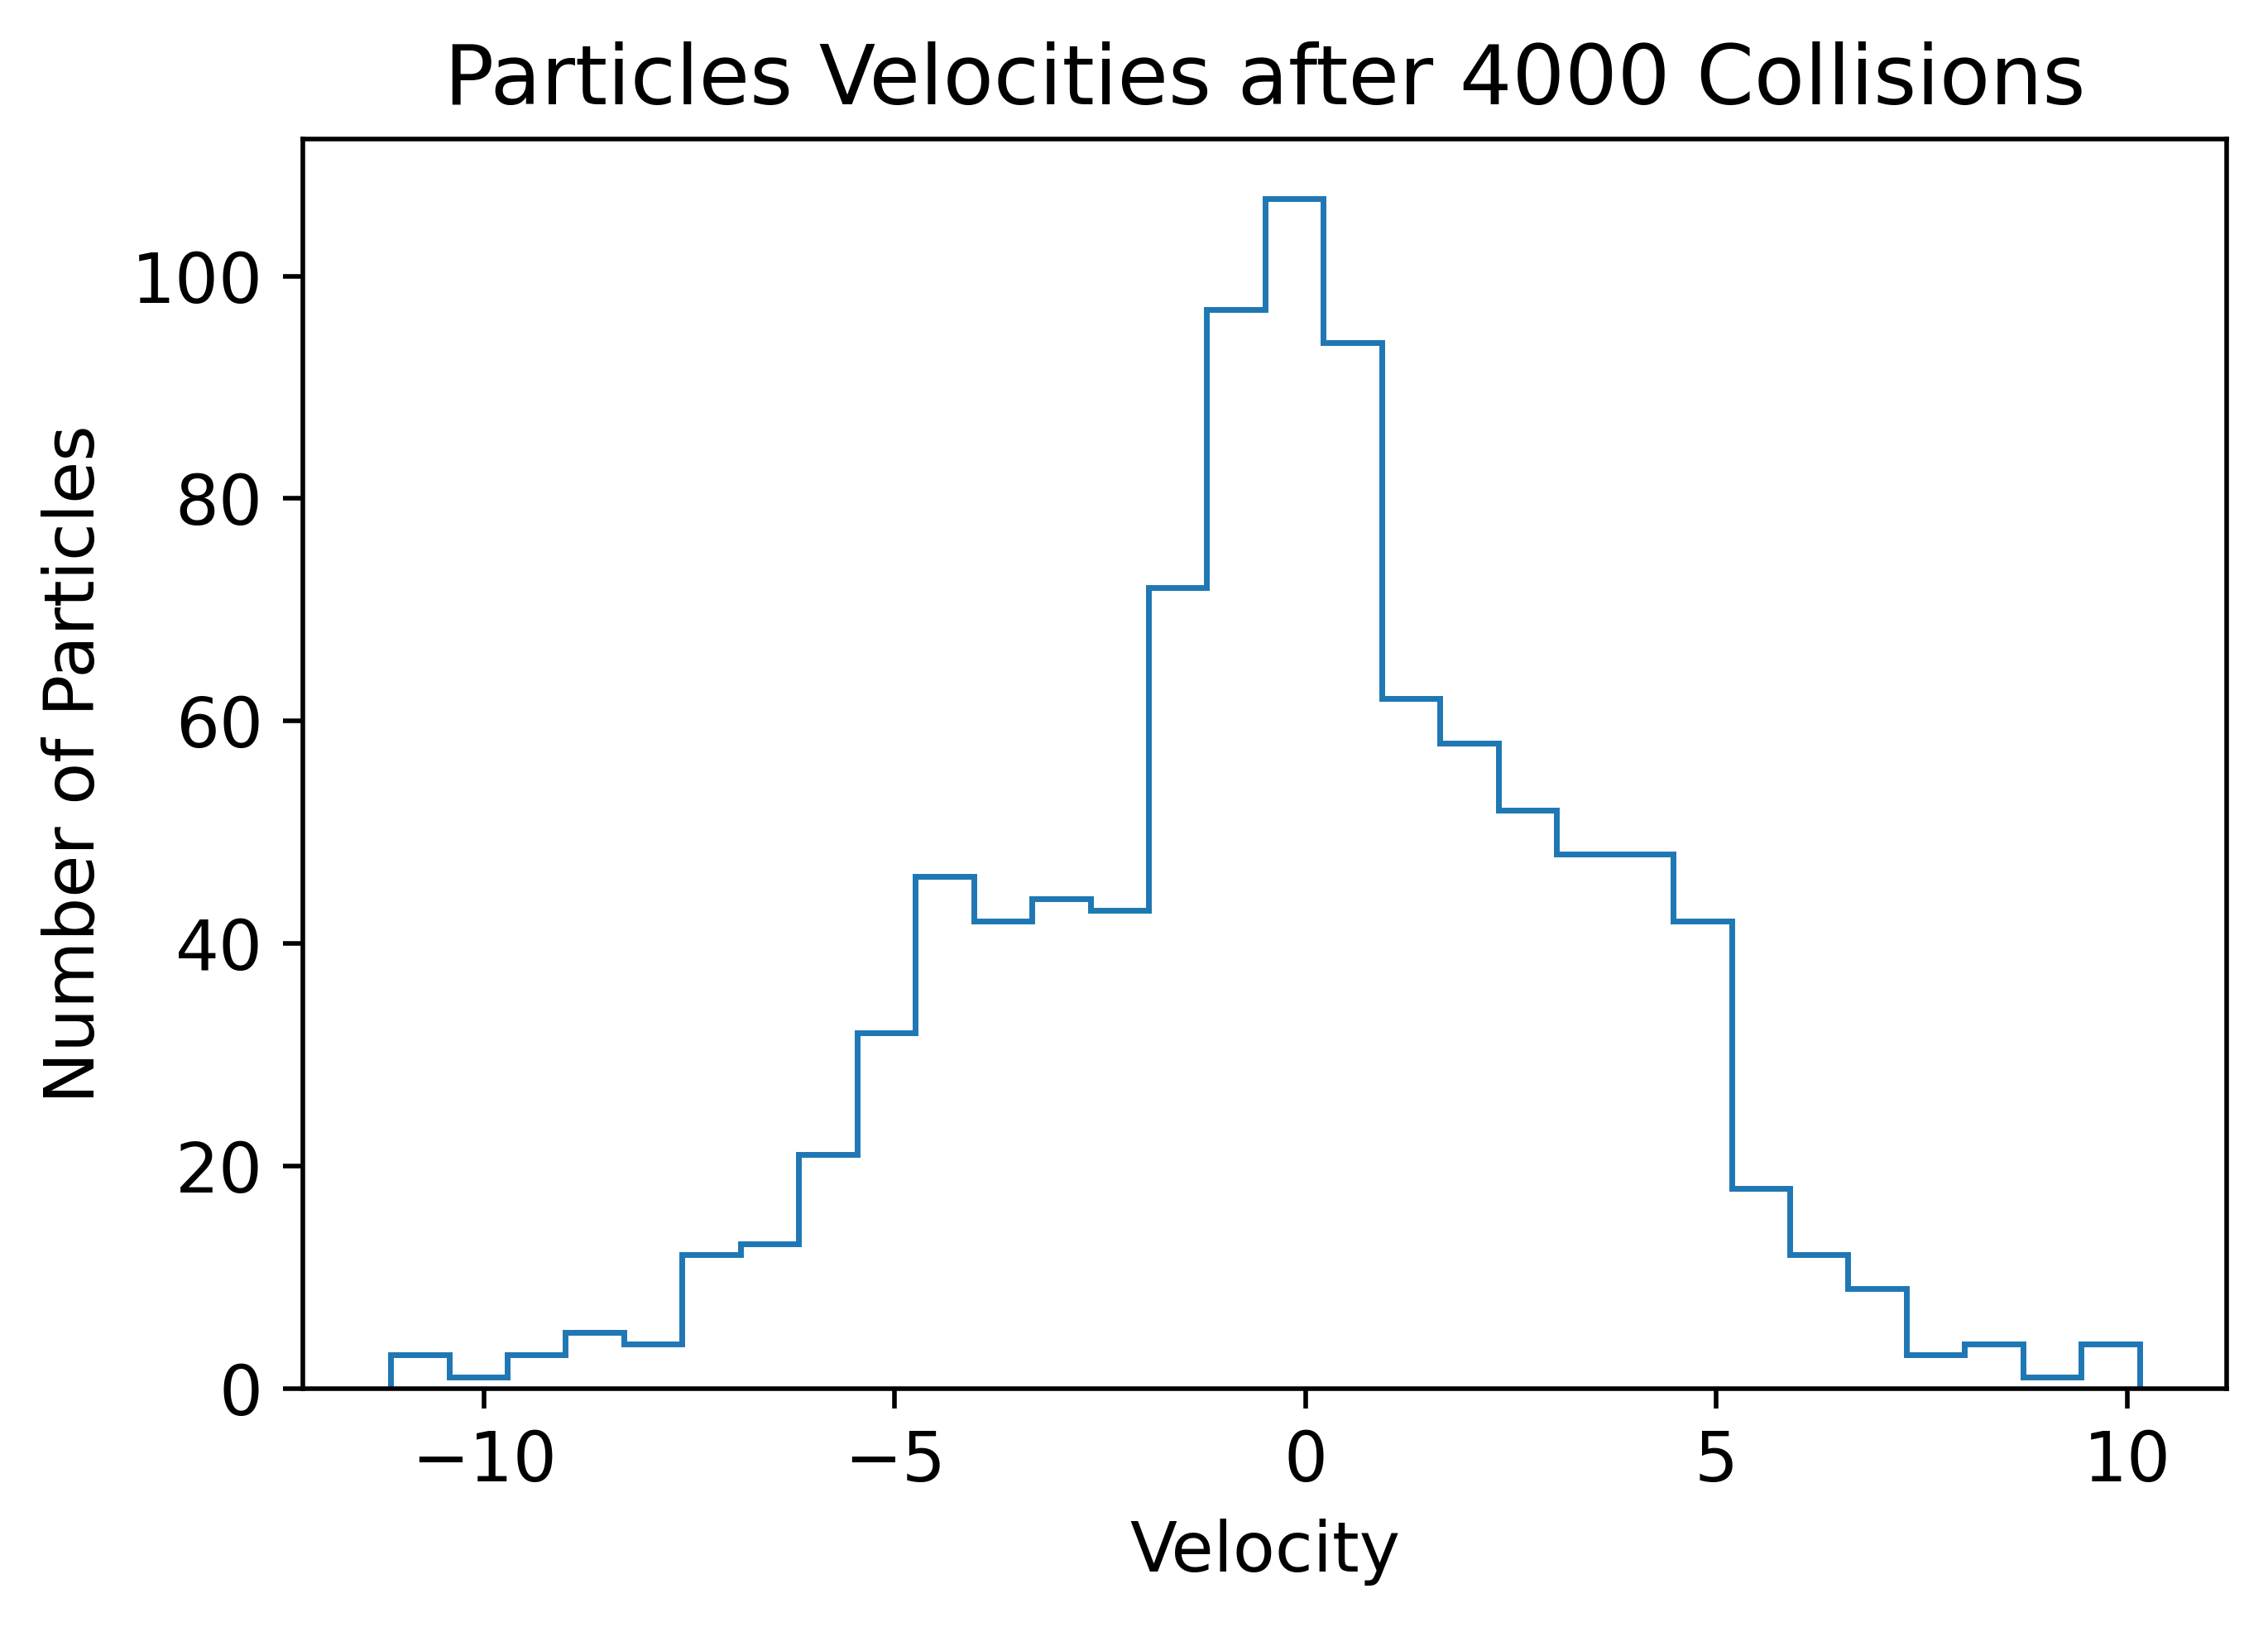

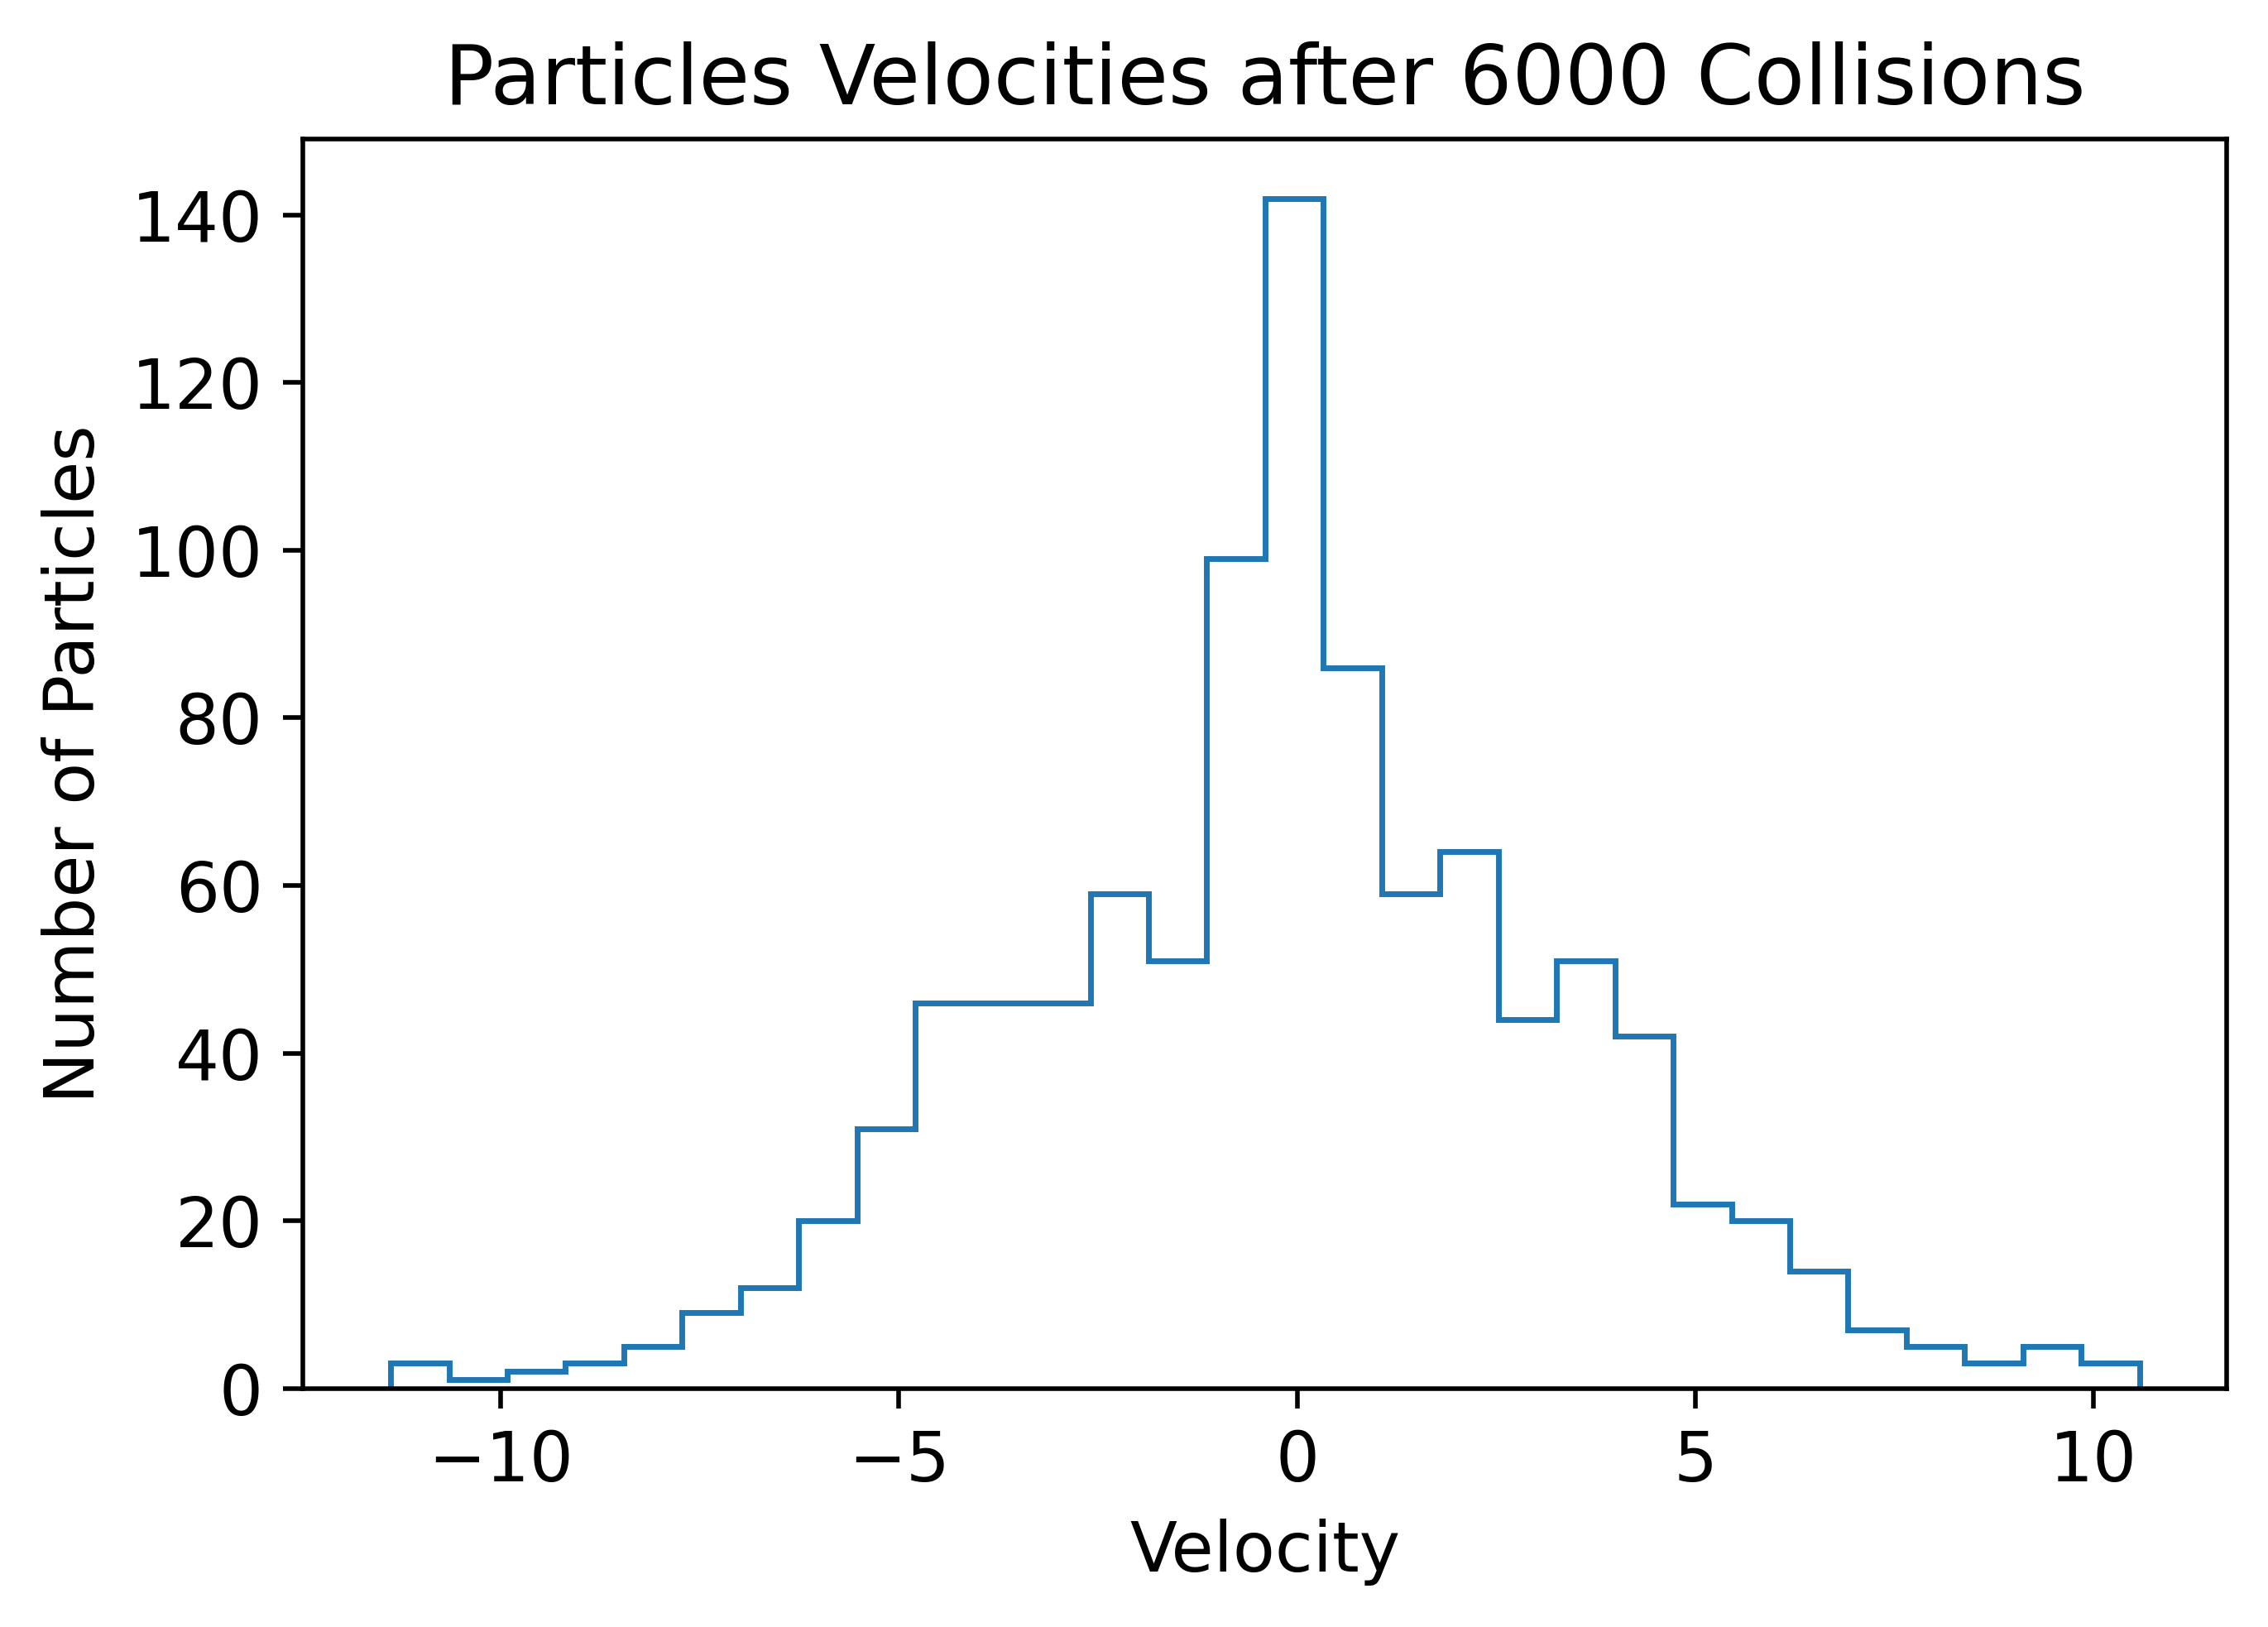

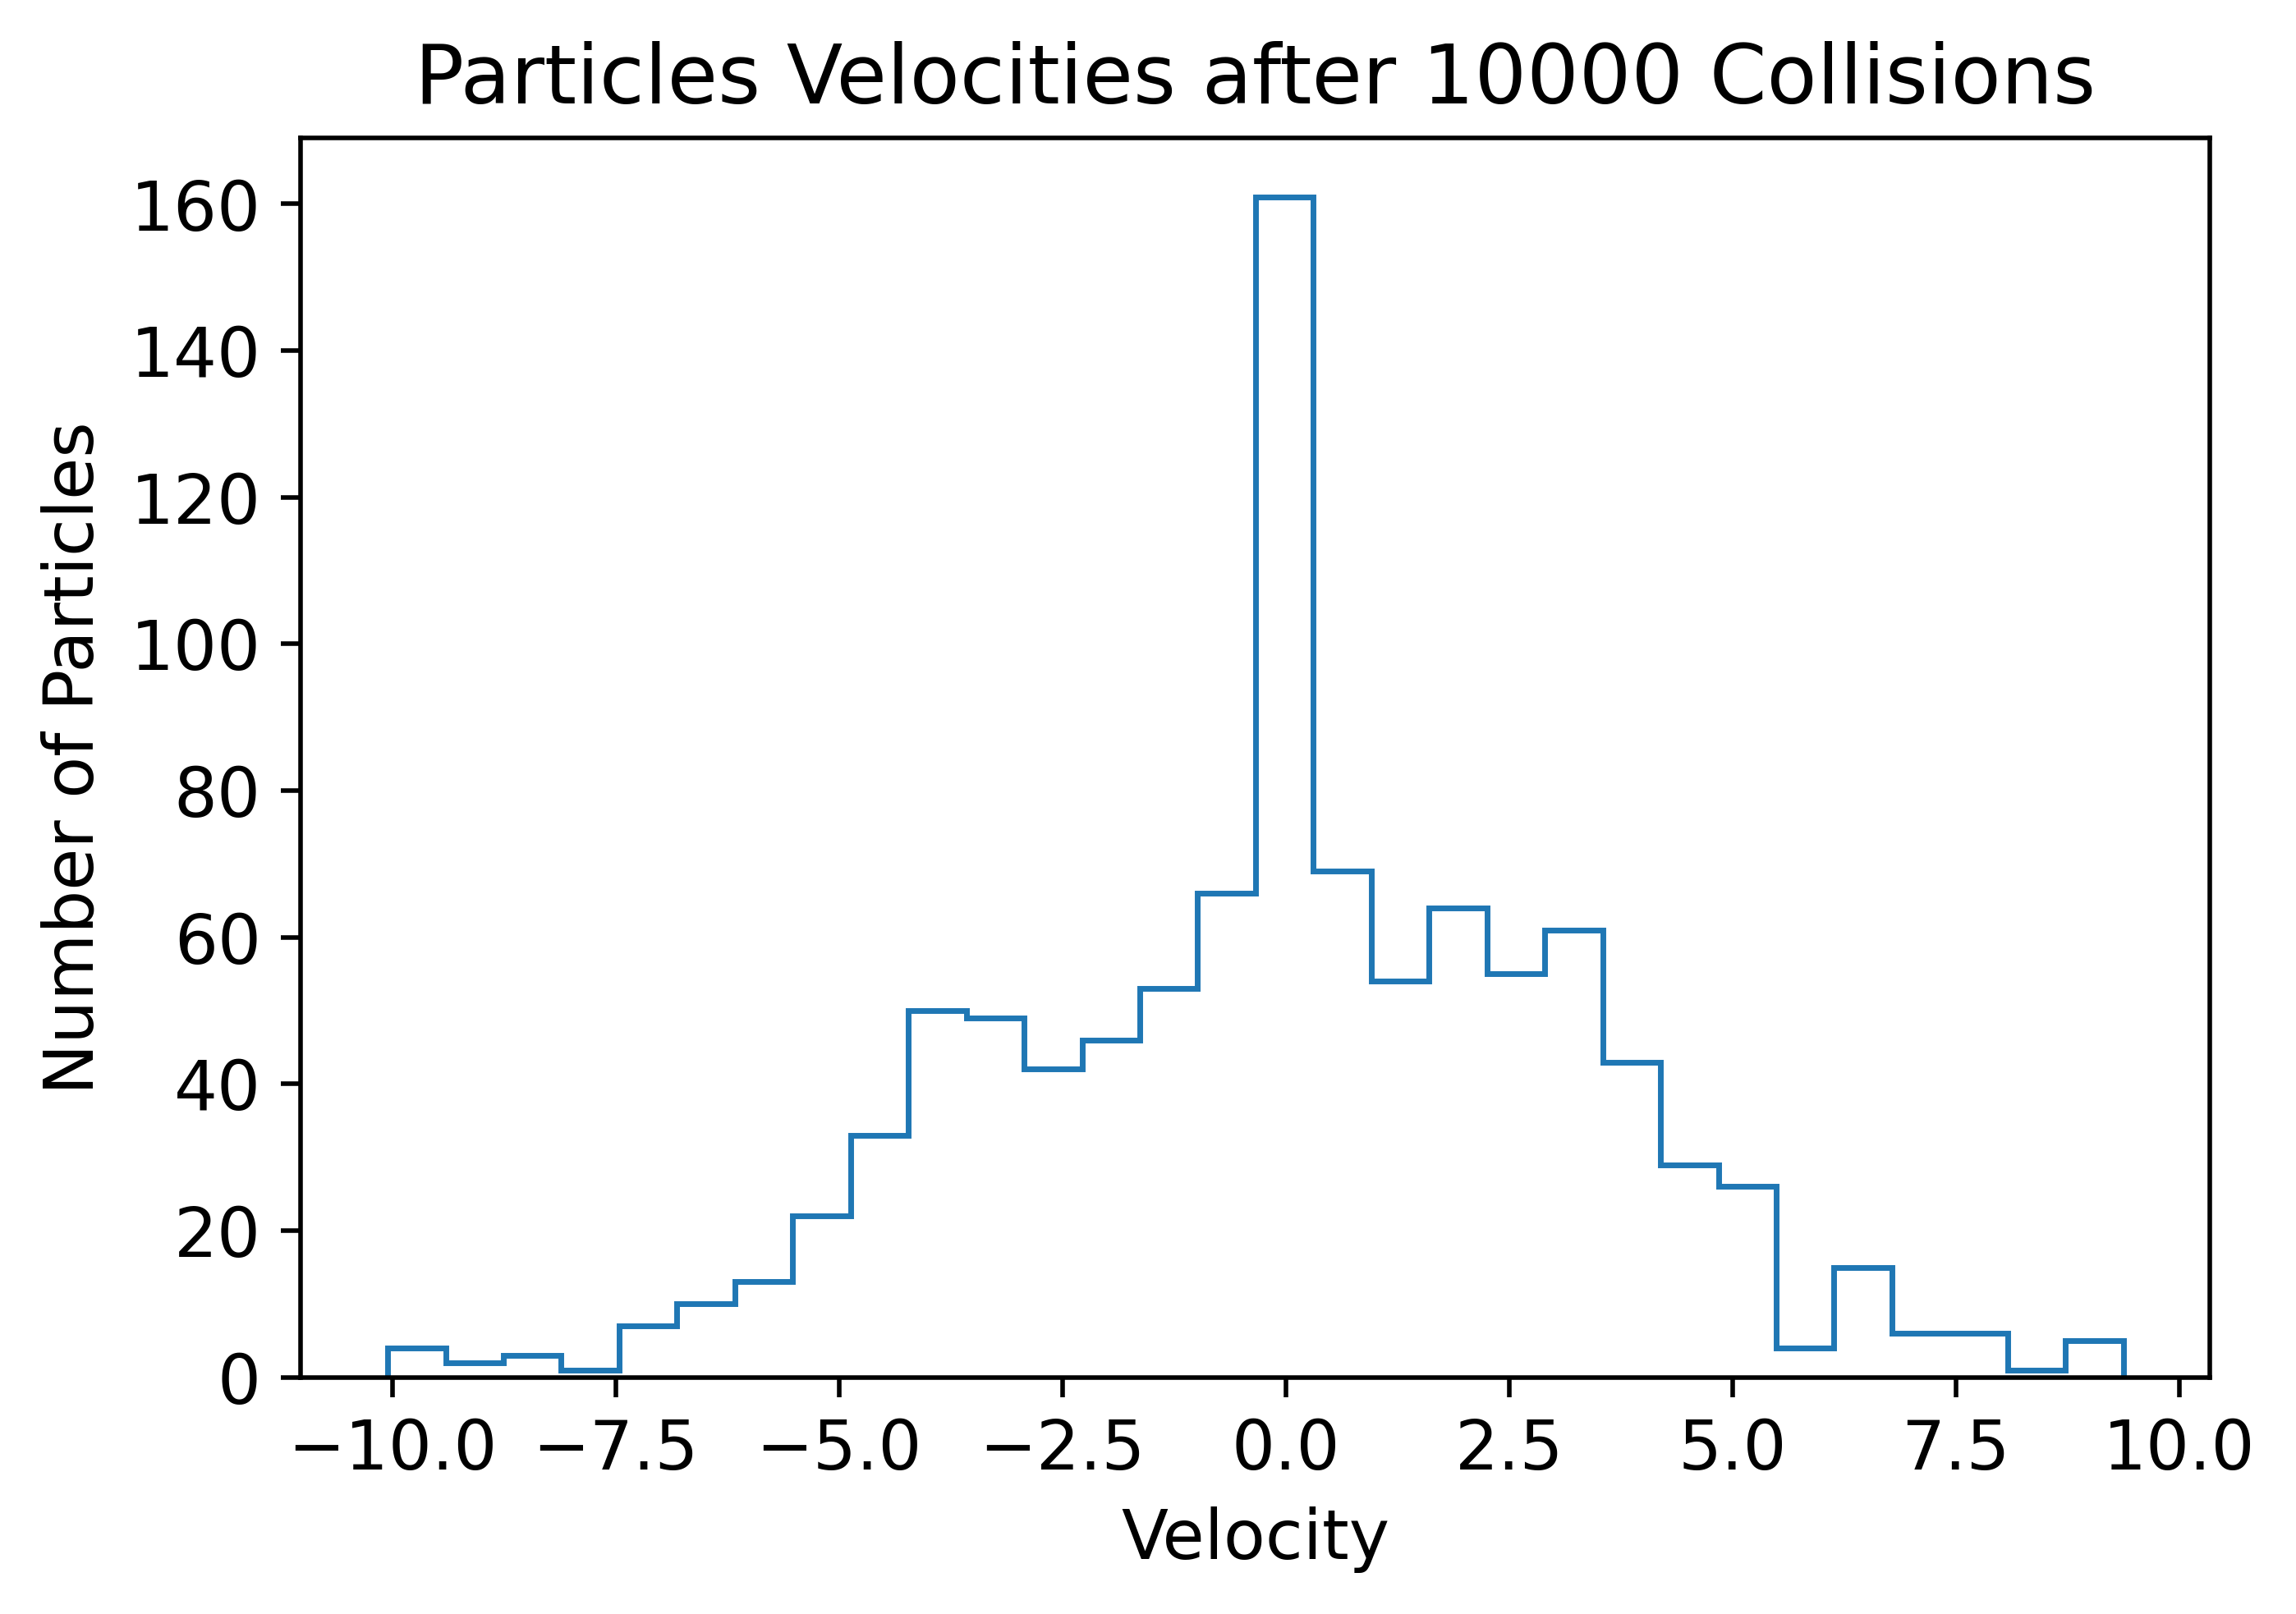

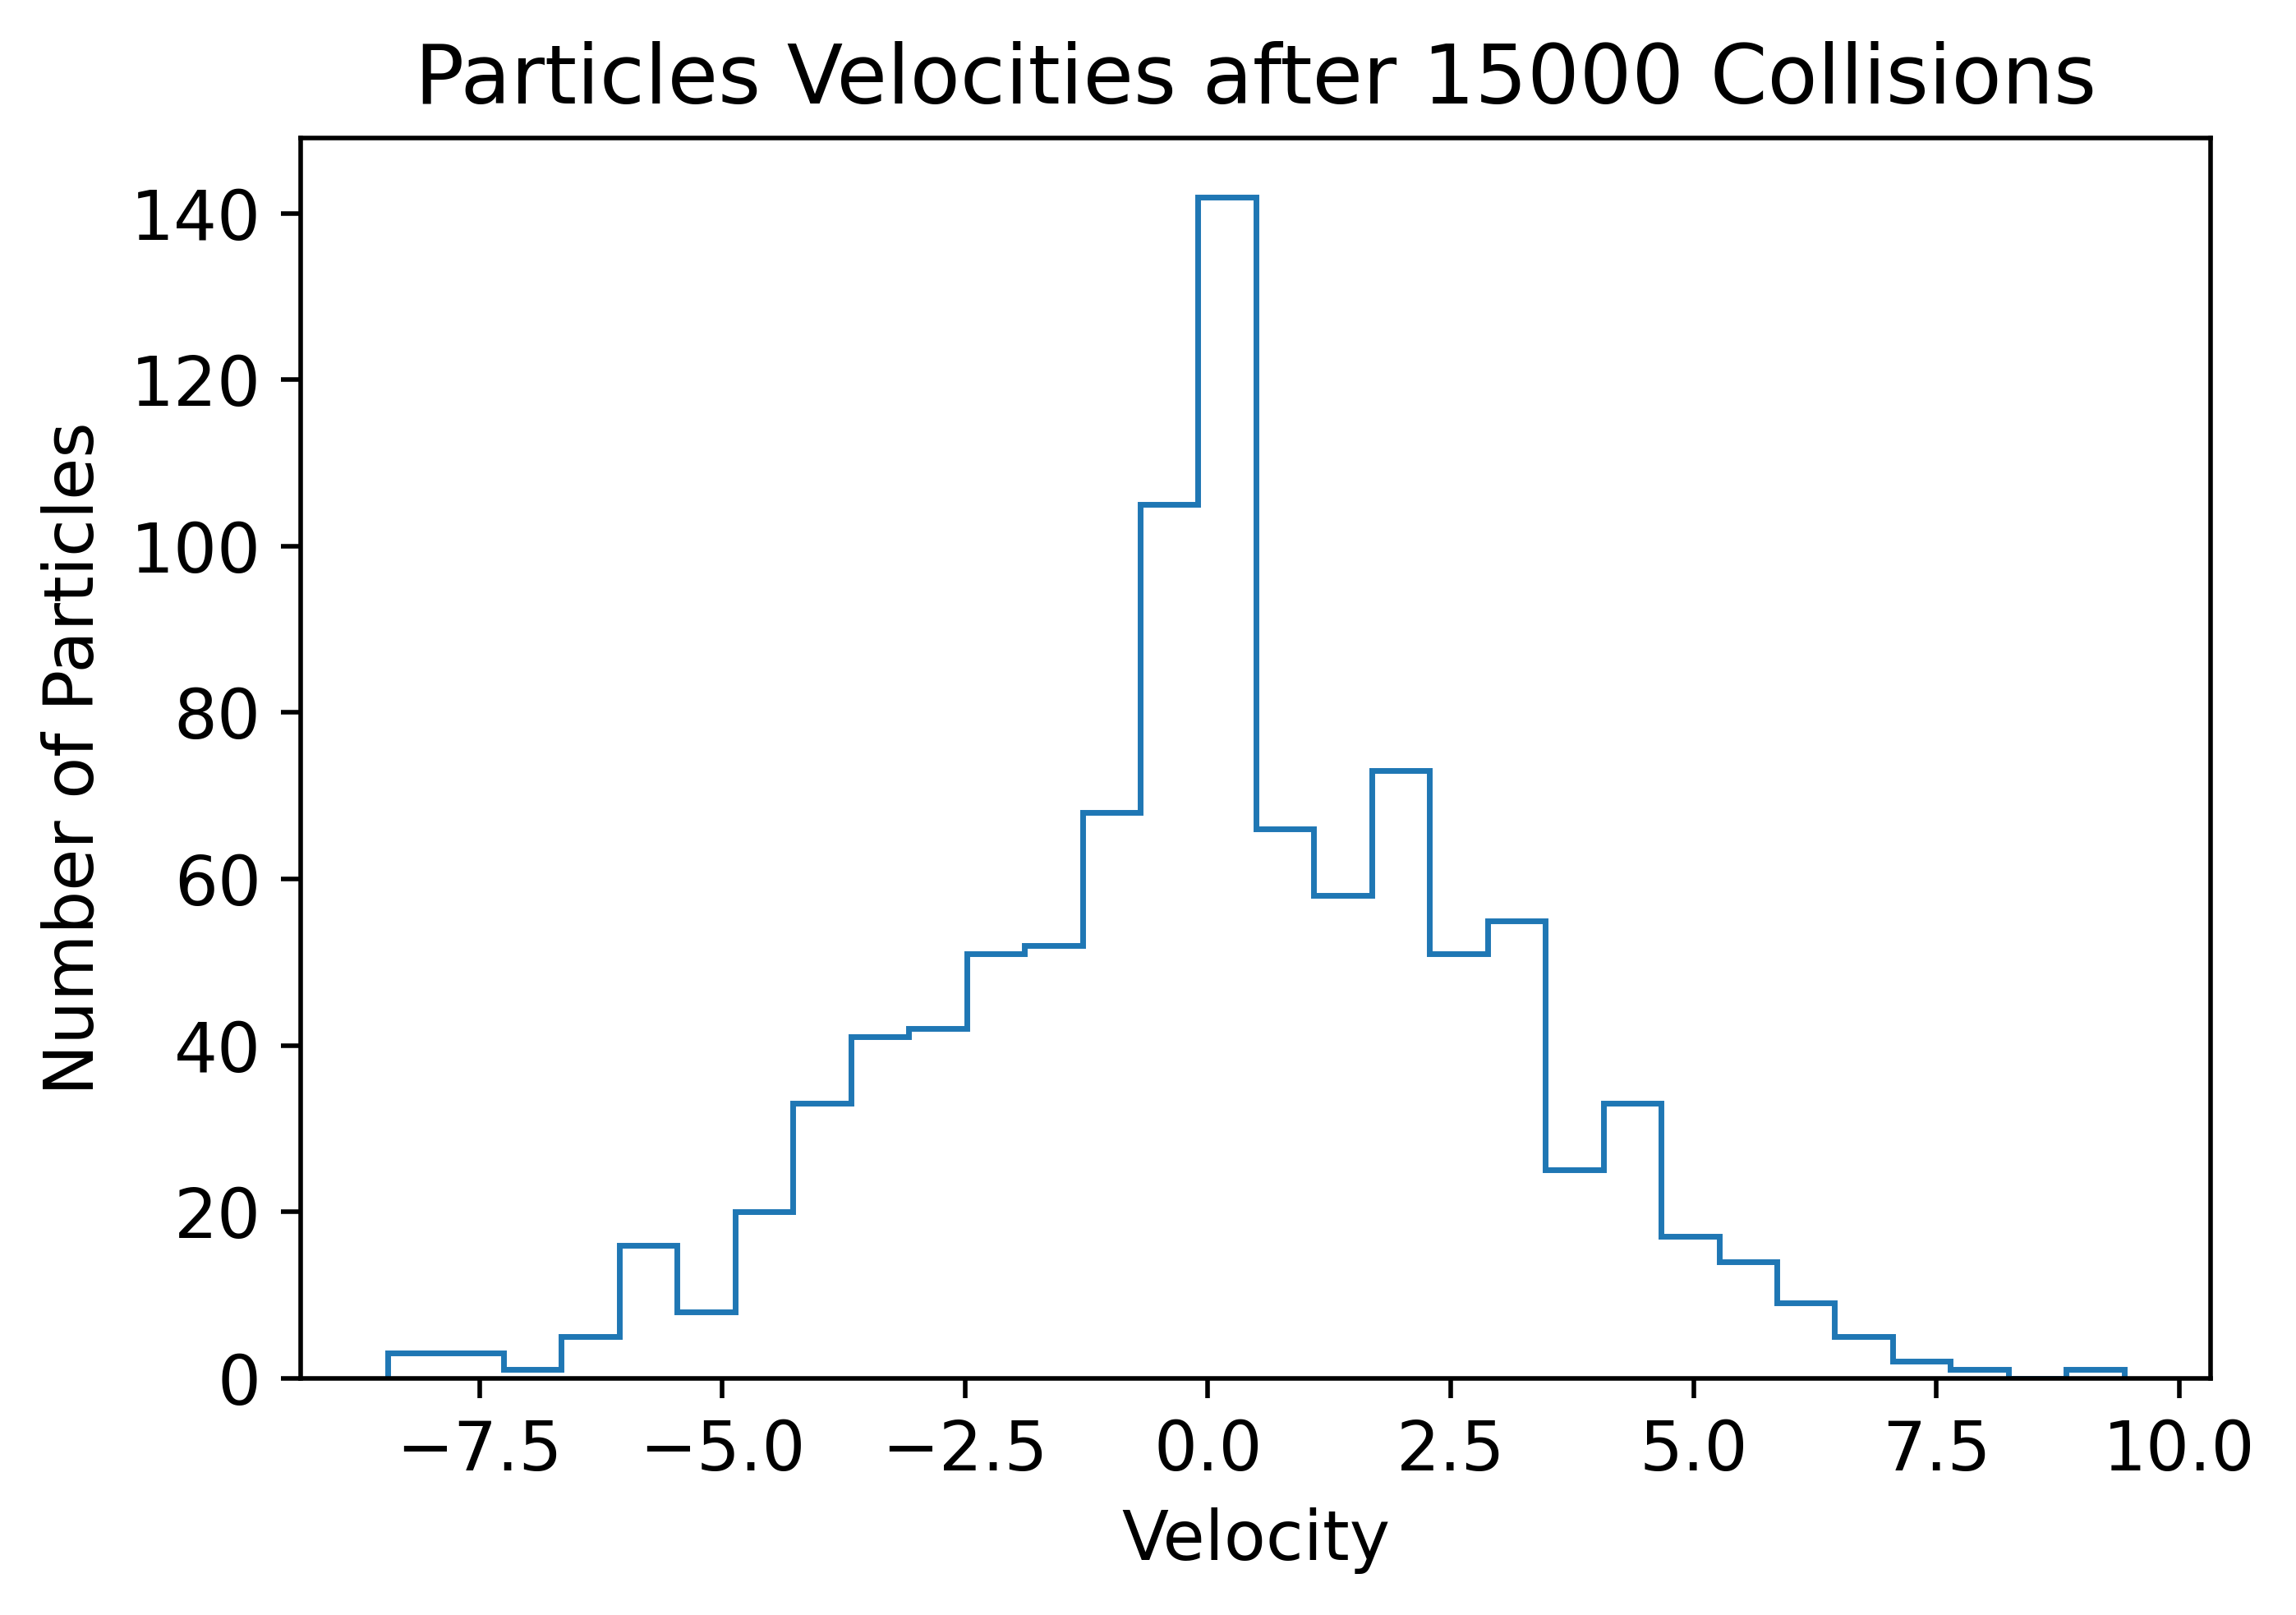

In [701]:
for i in range(len(hist_iterations)):
    plt.figure(dpi=500)
    plt.stairs(cs[hist_iterations[i]],bs[hist_iterations[i]])
    plt.xlabel('Velocity')
    plt.ylabel('Number of Particles')
    plt.title('Particles Velocities after ' + str(hist_iterations[i])+' Collisions')
    plt.savefig('hist_q3c'+str(i),bbox_inches='tight')

In [723]:
# meanexc = 2*parameters[0]*np.sqrt(2/np.pi)
# meanexc
meanexc, var_exc = maxwell.stats(*parameters,moments='mv')
print(meanexc)
print(var_exc)

3.6975249417913965
3.930025705327695


In [612]:
####Mini Exercises:
##Mini Ex a
z = np.zeros((1000,2))

In [613]:
#Mini Ex b
def mini_b(z, a, b):
    sumz = np.sum(z)
    return sumz**a, sumz**b

a,b = 2,3
z1 = rnd.rand(10)
# print(z1)
x,y = mini_b(z1,a,b)
print(x)
print(y)

47.74932523300324
329.95207062154685


/var/folders/88/k7cqn0rn6tq41vl_nhn7qdfw0000gn/T/ipykernel_95185/2051642043.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Mini_ex_c.png',bbox_incches= 'tight')


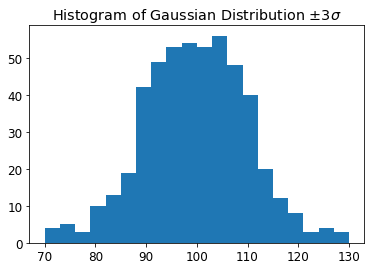

In [684]:
#Mini Ex c
z = rnd.normal(100,10,500)
plt.figure()
plt.hist(z,bins=20,range=(70,130))
plt.title('Histogram of Gaussian Distribution $±3 \sigma$')
plt.savefig('Mini_ex_c.png',bbox_incches= 'tight')

In [676]:
#Mini Ex d
a = [10., -10.]
r1 = rnd.choice(a,20)
print(r1)
r2 = rnd.choice(a,20)
print(r2)
r3 = rnd.choice(a,20)
print(r3)

[-10.  10. -10. -10.  10. -10.  10. -10.  10. -10. -10.  10. -10.  10.
 -10. -10. -10. -10. -10.  10.]
[ 10. -10. -10. -10. -10. -10. -10. -10. -10. -10.  10.  10.  10.  10.
 -10. -10.  10.  10. -10.  10.]
[ 10. -10. -10. -10.  10. -10.  10. -10. -10. -10.  10. -10.  10.  10.
  10. -10.  10. -10.  10.  10.]


/var/folders/88/k7cqn0rn6tq41vl_nhn7qdfw0000gn/T/ipykernel_95185/4087680417.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Mini_ex_e.png',bbox_incches= 'tight')


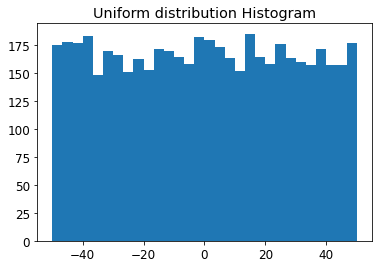

In [688]:
#Mini Ex e
z = []
a=0
for i in range(0,50):
    a=0
    while a < 100:
        val = rnd.uniform(-50.,50.) #it is half open interval - however very unlikely that the bounds are sampled anyway
        z.append(val)
        a+=1

# len(z)
# np.max(z)
plt.figure()
plt.hist(z,bins=30)
plt.title('Uniform distribution Histogram')
plt.savefig('Mini_ex_e.png',bbox_incches= 'tight')
